In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
from scipy import stats

In [2]:
df=pd.DataFrame()
df=pd.read_excel("D:\Data Science\Capstone\ASIA (1).xlsx")

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-03-02 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
4,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class


In [4]:
df['Delivery Status'].value_counts()

Late delivery        17230
Advance shipping      7149
Shipping on time      5473
Shipping canceled     1260
Name: Delivery Status, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31112 entries, 0 to 31111
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           31112 non-null  object 
 1   Days for shipping (real)       31112 non-null  int64  
 2   Days for shipment (scheduled)  31112 non-null  int64  
 3   Benefit per order              31112 non-null  float64
 4   Sales per customer             31112 non-null  float64
 5   Delivery Status                31112 non-null  object 
 6   Late_delivery_risk             31112 non-null  int64  
 7   Category Id                    31112 non-null  int64  
 8   Category Name                  31112 non-null  object 
 9   Customer City                  31112 non-null  object 
 10  Customer Country               31112 non-null  object 
 11  Customer Email                 31112 non-null  object 
 12  Customer Fname                 31112 non-null 

In [6]:
df.drop(['Order Zipcode','Product Description','Product Status','Category Id','Customer Email','Customer Fname','Customer Id'
         ,'Customer Lname','Customer Password','Customer Street','Customer Zipcode','Department Id','Latitude','Longitude','Market','Order Customer Id','Order Id'
        ,'Order Item Cardprod Id','Order Item Id','Order Zipcode','Product Card Id','Product Category Id','Product Image','Product Status'
        ],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31112 entries, 0 to 31111
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           31112 non-null  object 
 1   Days for shipping (real)       31112 non-null  int64  
 2   Days for shipment (scheduled)  31112 non-null  int64  
 3   Benefit per order              31112 non-null  float64
 4   Sales per customer             31112 non-null  float64
 5   Delivery Status                31112 non-null  object 
 6   Late_delivery_risk             31112 non-null  int64  
 7   Category Name                  31112 non-null  object 
 8   Customer City                  31112 non-null  object 
 9   Customer Country               31112 non-null  object 
 10  Customer Segment               31112 non-null  object 
 11  Customer State                 31112 non-null  object 
 12  Department Name                31112 non-null 

In [8]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,...,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2018-03-02 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,...,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,2,1,95.180000,288.420013,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,327.75,288.420013,95.180000,Eastern Asia,Guangdong,COMPLETE,Smart watch,327.75,1/15/2018 10:42,First Class
4,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,Sporting Goods,Miami,EE. UU.,...,327.75,285.140015,68.430000,Eastern Asia,Guangdong,PROCESSING,Smart watch,327.75,1/15/2018 10:21,First Class


In [9]:
df['Delivery Status'].value_counts()

Late delivery        17230
Advance shipping      7149
Shipping on time      5473
Shipping canceled     1260
Name: Delivery Status, dtype: int64

In [10]:
df_num=df.select_dtypes(np.number)

In [11]:
df_cat=df.select_dtypes('object')

In [12]:
df_cat.isnull().sum()

Type                          0
Delivery Status               0
Category Name                 0
Customer City                 0
Customer Country              0
Customer Segment              0
Customer State                0
Department Name               0
Order City                    0
Order Country                 0
order date (DateOrders)       0
Sales                         0
Order Region                  0
Order State                   0
Order Status                  0
Product Name                  0
Product Price                 0
shipping date (DateOrders)    0
Shipping Mode                 0
dtype: int64

## Data Cleaning

In [13]:
df_num.isnull().sum()

Days for shipping (real)           0
Days for shipment (scheduled)      0
Benefit per order                  0
Sales per customer                 0
Late_delivery_risk                 0
Order Item Discount              159
Order Item Discount Rate           0
Order Item Product Price           0
Order Item Profit Ratio            0
Order Item Quantity              131
Order Item Total                   0
Order Profit Per Order             0
dtype: int64

In [14]:
df['Order Item Discount']=df.groupby('Product Name')['Order Item Discount'].transform(lambda x: x.fillna(x.median()))

In [15]:
df['Order Item Quantity']=df.groupby('Product Name')['Order Item Quantity'].transform(lambda x: x.fillna(x.median()))

In [16]:
df_num.isnull().sum()

Days for shipping (real)           0
Days for shipment (scheduled)      0
Benefit per order                  0
Sales per customer                 0
Late_delivery_risk                 0
Order Item Discount              159
Order Item Discount Rate           0
Order Item Product Price           0
Order Item Profit Ratio            0
Order Item Quantity              131
Order Item Total                   0
Order Profit Per Order             0
dtype: int64

In [17]:
df['Sales']=np.where(df['Sales']=='$ 129.9900055',129.9900055,df['Sales'])

In [18]:
df['Sales']=df['Sales'].astype(float)

In [19]:
df['Product Price']=np.where(df['Product Price']=='$ 59.99000168',59.99000168,df['Product Price'])

In [20]:
df['Product Price']=df['Product Price'].astype(float)

In [21]:
df_num=df.select_dtypes(include=np.number)

In [22]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31112 entries, 0 to 31111
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Days for shipping (real)       31112 non-null  int64  
 1   Days for shipment (scheduled)  31112 non-null  int64  
 2   Benefit per order              31112 non-null  float64
 3   Sales per customer             31112 non-null  float64
 4   Late_delivery_risk             31112 non-null  int64  
 5   Order Item Discount            31112 non-null  float64
 6   Order Item Discount Rate       31112 non-null  float64
 7   Order Item Product Price       31112 non-null  float64
 8   Order Item Profit Ratio        31112 non-null  float64
 9   Order Item Quantity            31112 non-null  float64
 10  Sales                          31112 non-null  float64
 11  Order Item Total               31112 non-null  float64
 12  Order Profit Per Order         31112 non-null 

In [23]:
df_cat.drop(['Sales','Product Price'],axis=1,inplace=True)

In [24]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31112 entries, 0 to 31111
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Type                        31112 non-null  object
 1   Delivery Status             31112 non-null  object
 2   Category Name               31112 non-null  object
 3   Customer City               31112 non-null  object
 4   Customer Country            31112 non-null  object
 5   Customer Segment            31112 non-null  object
 6   Customer State              31112 non-null  object
 7   Department Name             31112 non-null  object
 8   Order City                  31112 non-null  object
 9   Order Country               31112 non-null  object
 10  order date (DateOrders)     31112 non-null  object
 11  Order Region                31112 non-null  object
 12  Order State                 31112 non-null  object
 13  Order Status                31112 non-null  ob

## univariate analysis for numerical variables

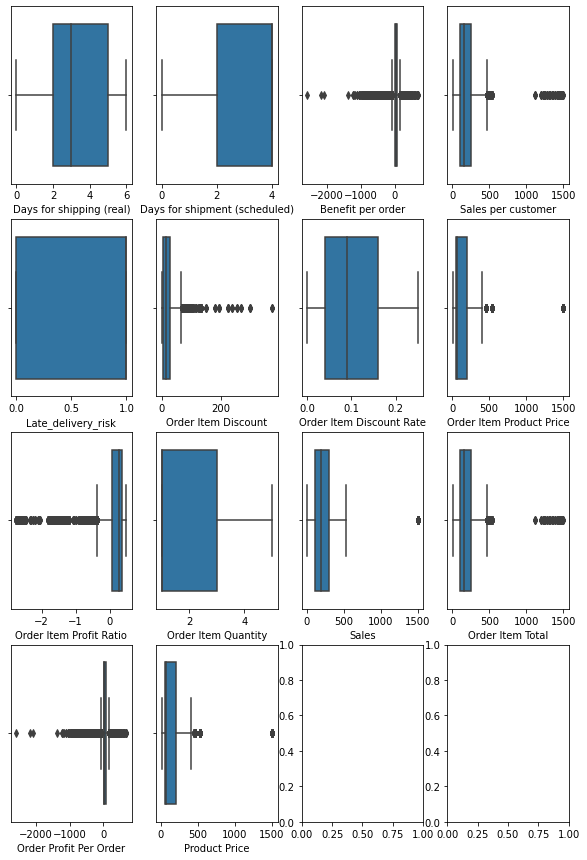

In [25]:
fig,ax=plt.subplots(4,4,figsize=(10,15))
for i,subplot in zip(df_num,ax.flatten()):
    sns.boxplot(df[i],ax=subplot)

## Bivariate analysis for numerical varaiables with target varaiable

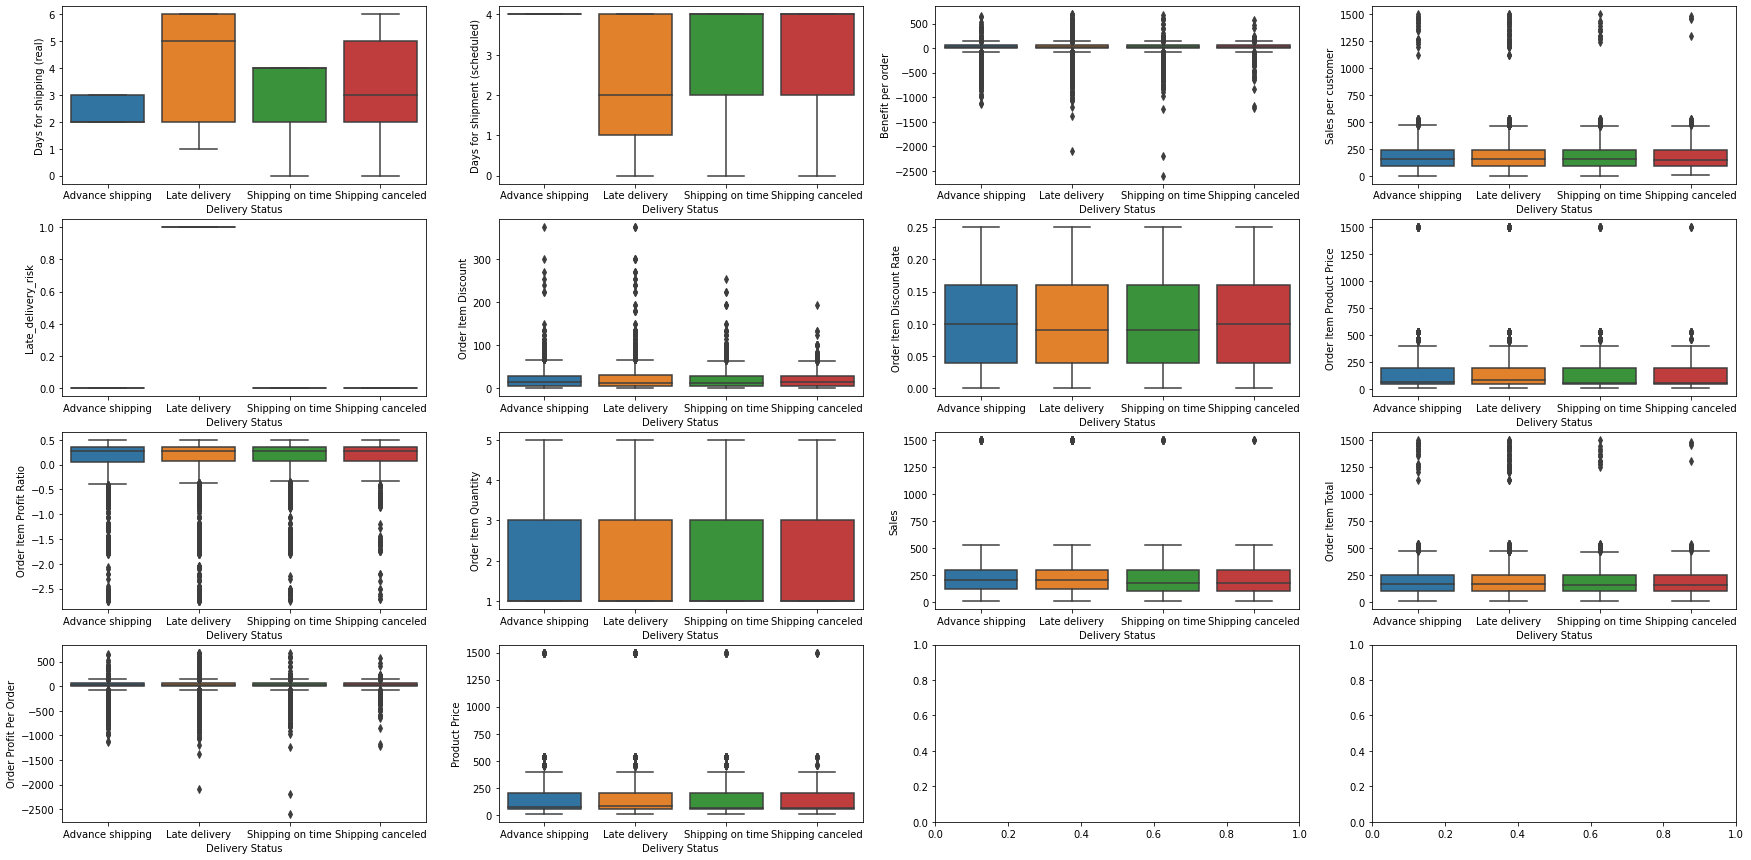

In [26]:
fig,ax=plt.subplots(4,4,figsize=(30,15))
for i,subplot in zip(df_num,ax.flatten()):
    sns.boxplot(df['Delivery Status'],df[i],ax=subplot)

In [27]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31112 entries, 0 to 31111
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Type                        31112 non-null  object
 1   Delivery Status             31112 non-null  object
 2   Category Name               31112 non-null  object
 3   Customer City               31112 non-null  object
 4   Customer Country            31112 non-null  object
 5   Customer Segment            31112 non-null  object
 6   Customer State              31112 non-null  object
 7   Department Name             31112 non-null  object
 8   Order City                  31112 non-null  object
 9   Order Country               31112 non-null  object
 10  order date (DateOrders)     31112 non-null  object
 11  Order Region                31112 non-null  object
 12  Order State                 31112 non-null  object
 13  Order Status                31112 non-null  ob

## Univariate analysis for categorical variables

<AxesSubplot:xlabel='Type', ylabel='count'>

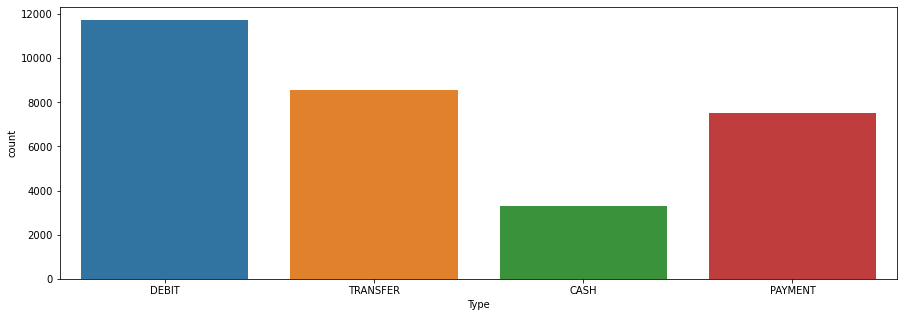

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(df_cat.iloc[:,0])

<AxesSubplot:xlabel='Delivery Status', ylabel='count'>

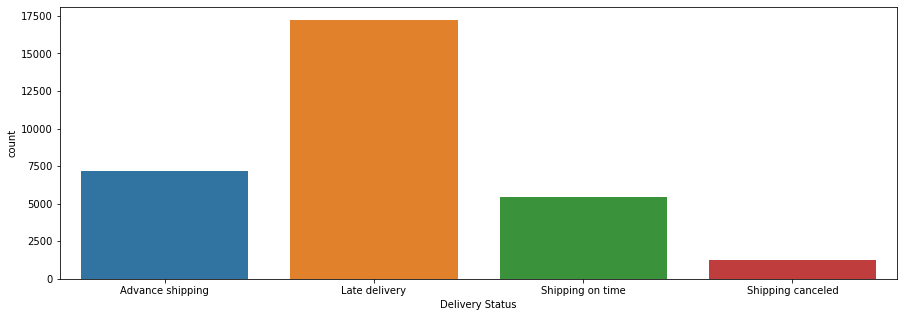

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(df_cat.iloc[:,1])

<AxesSubplot:xlabel='Category Name', ylabel='count'>

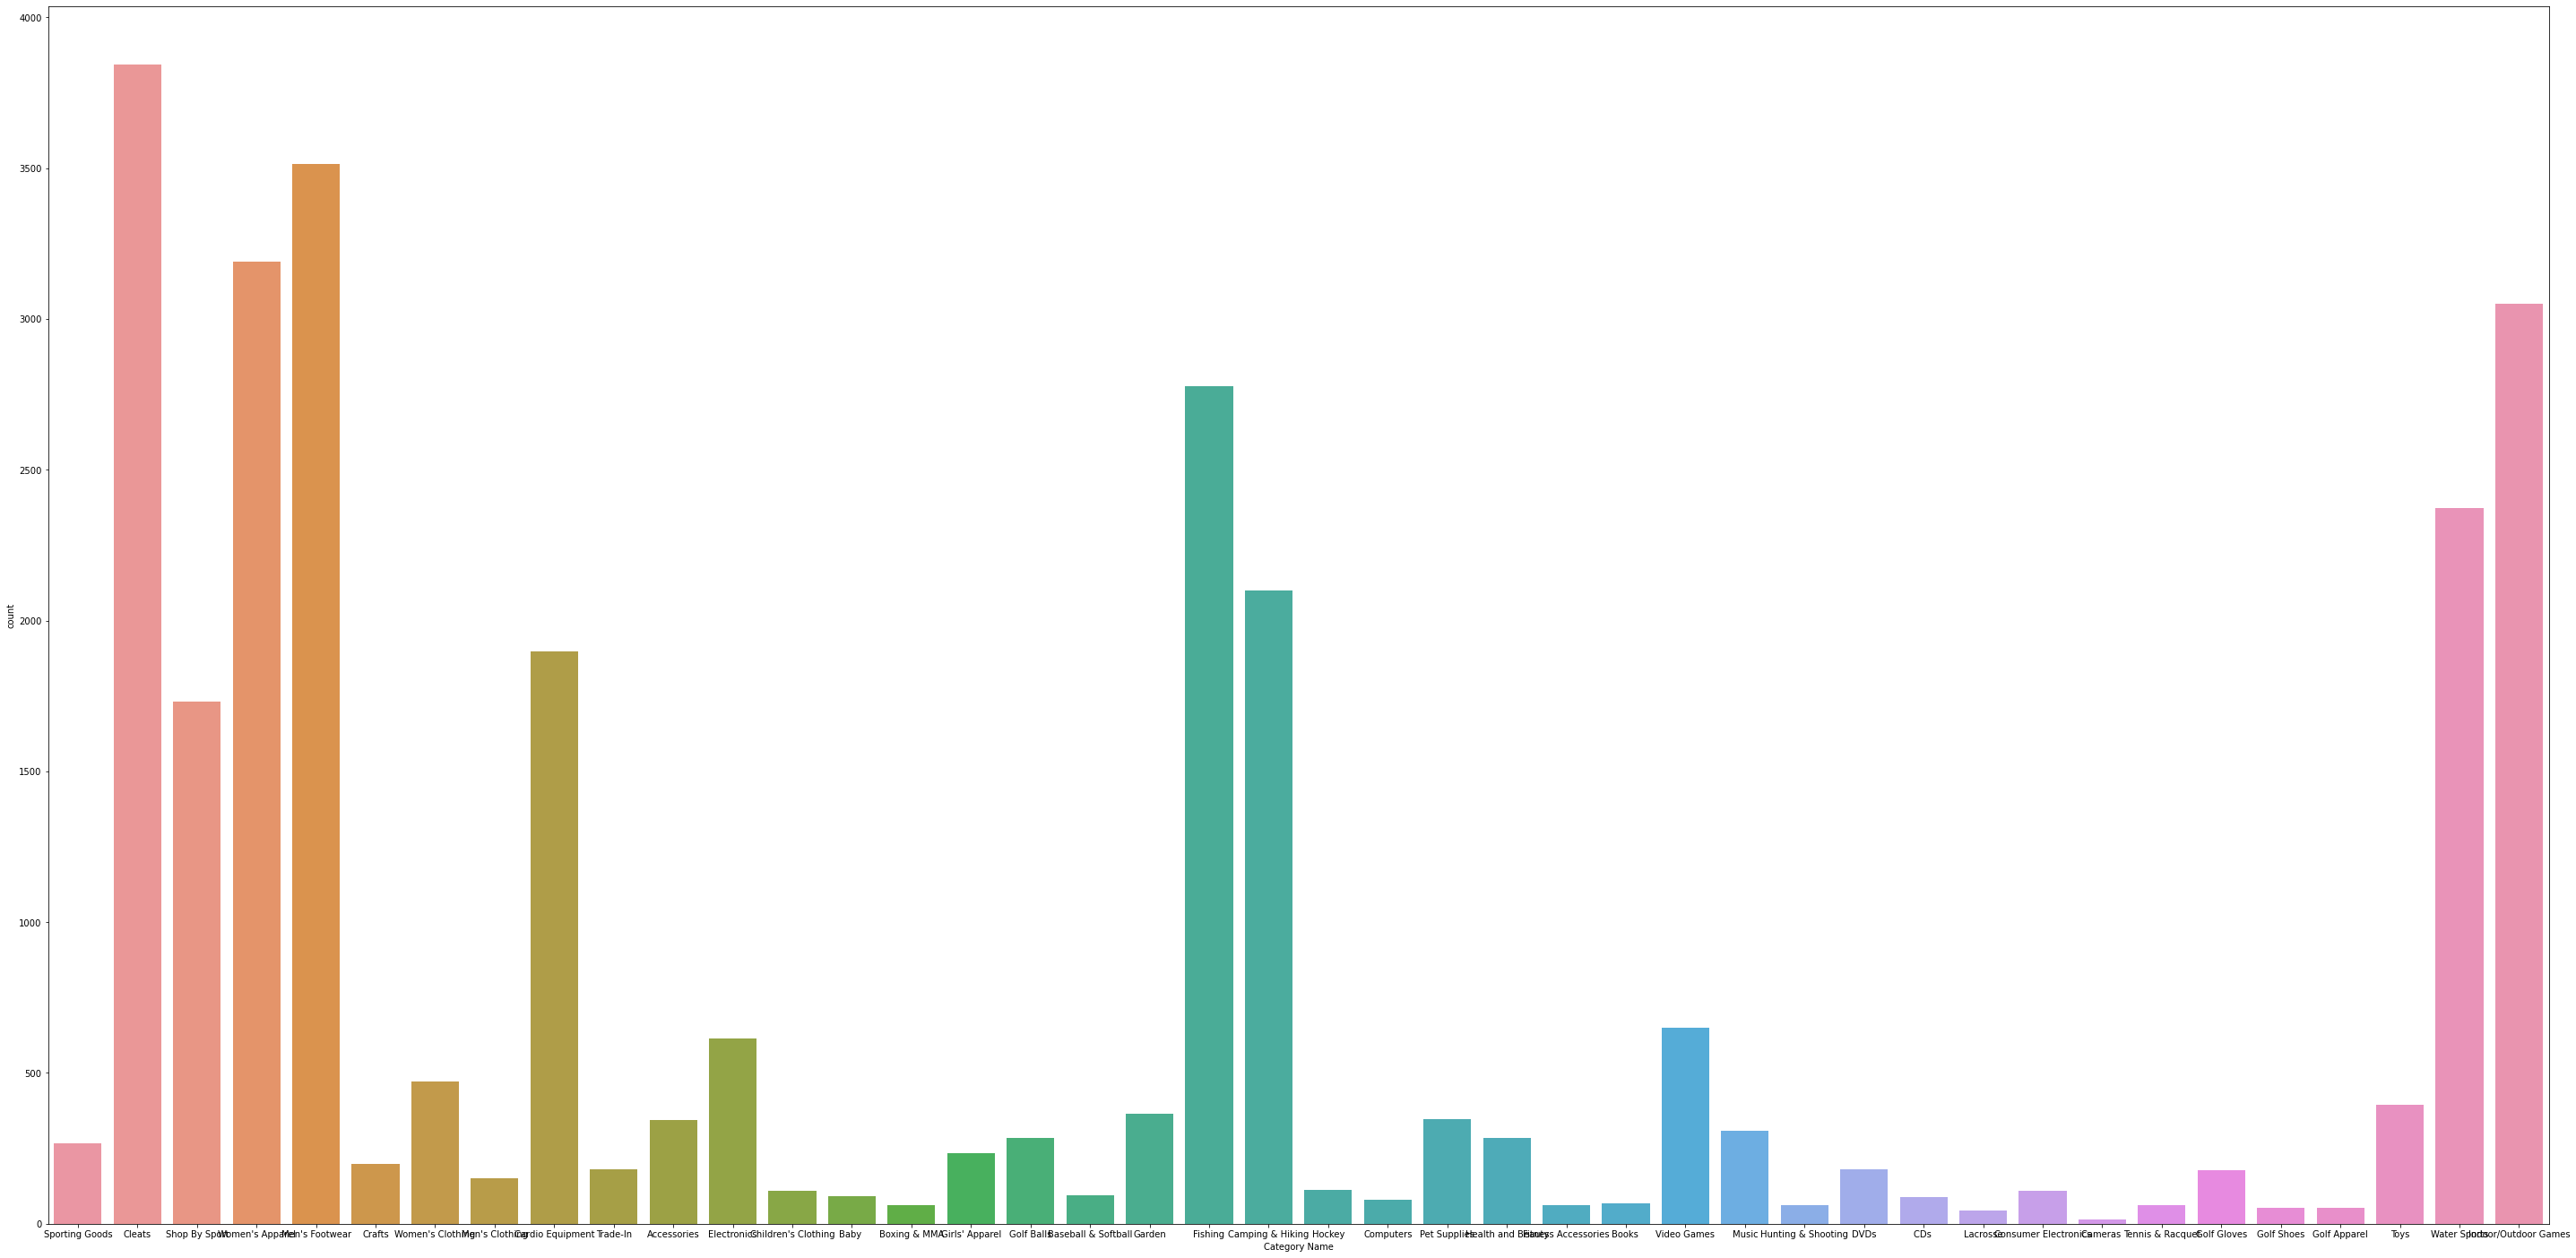

In [30]:
plt.figure(figsize=(50,25))
sns.countplot(df_cat.iloc[:,2])

<AxesSubplot:xlabel='Customer City', ylabel='count'>

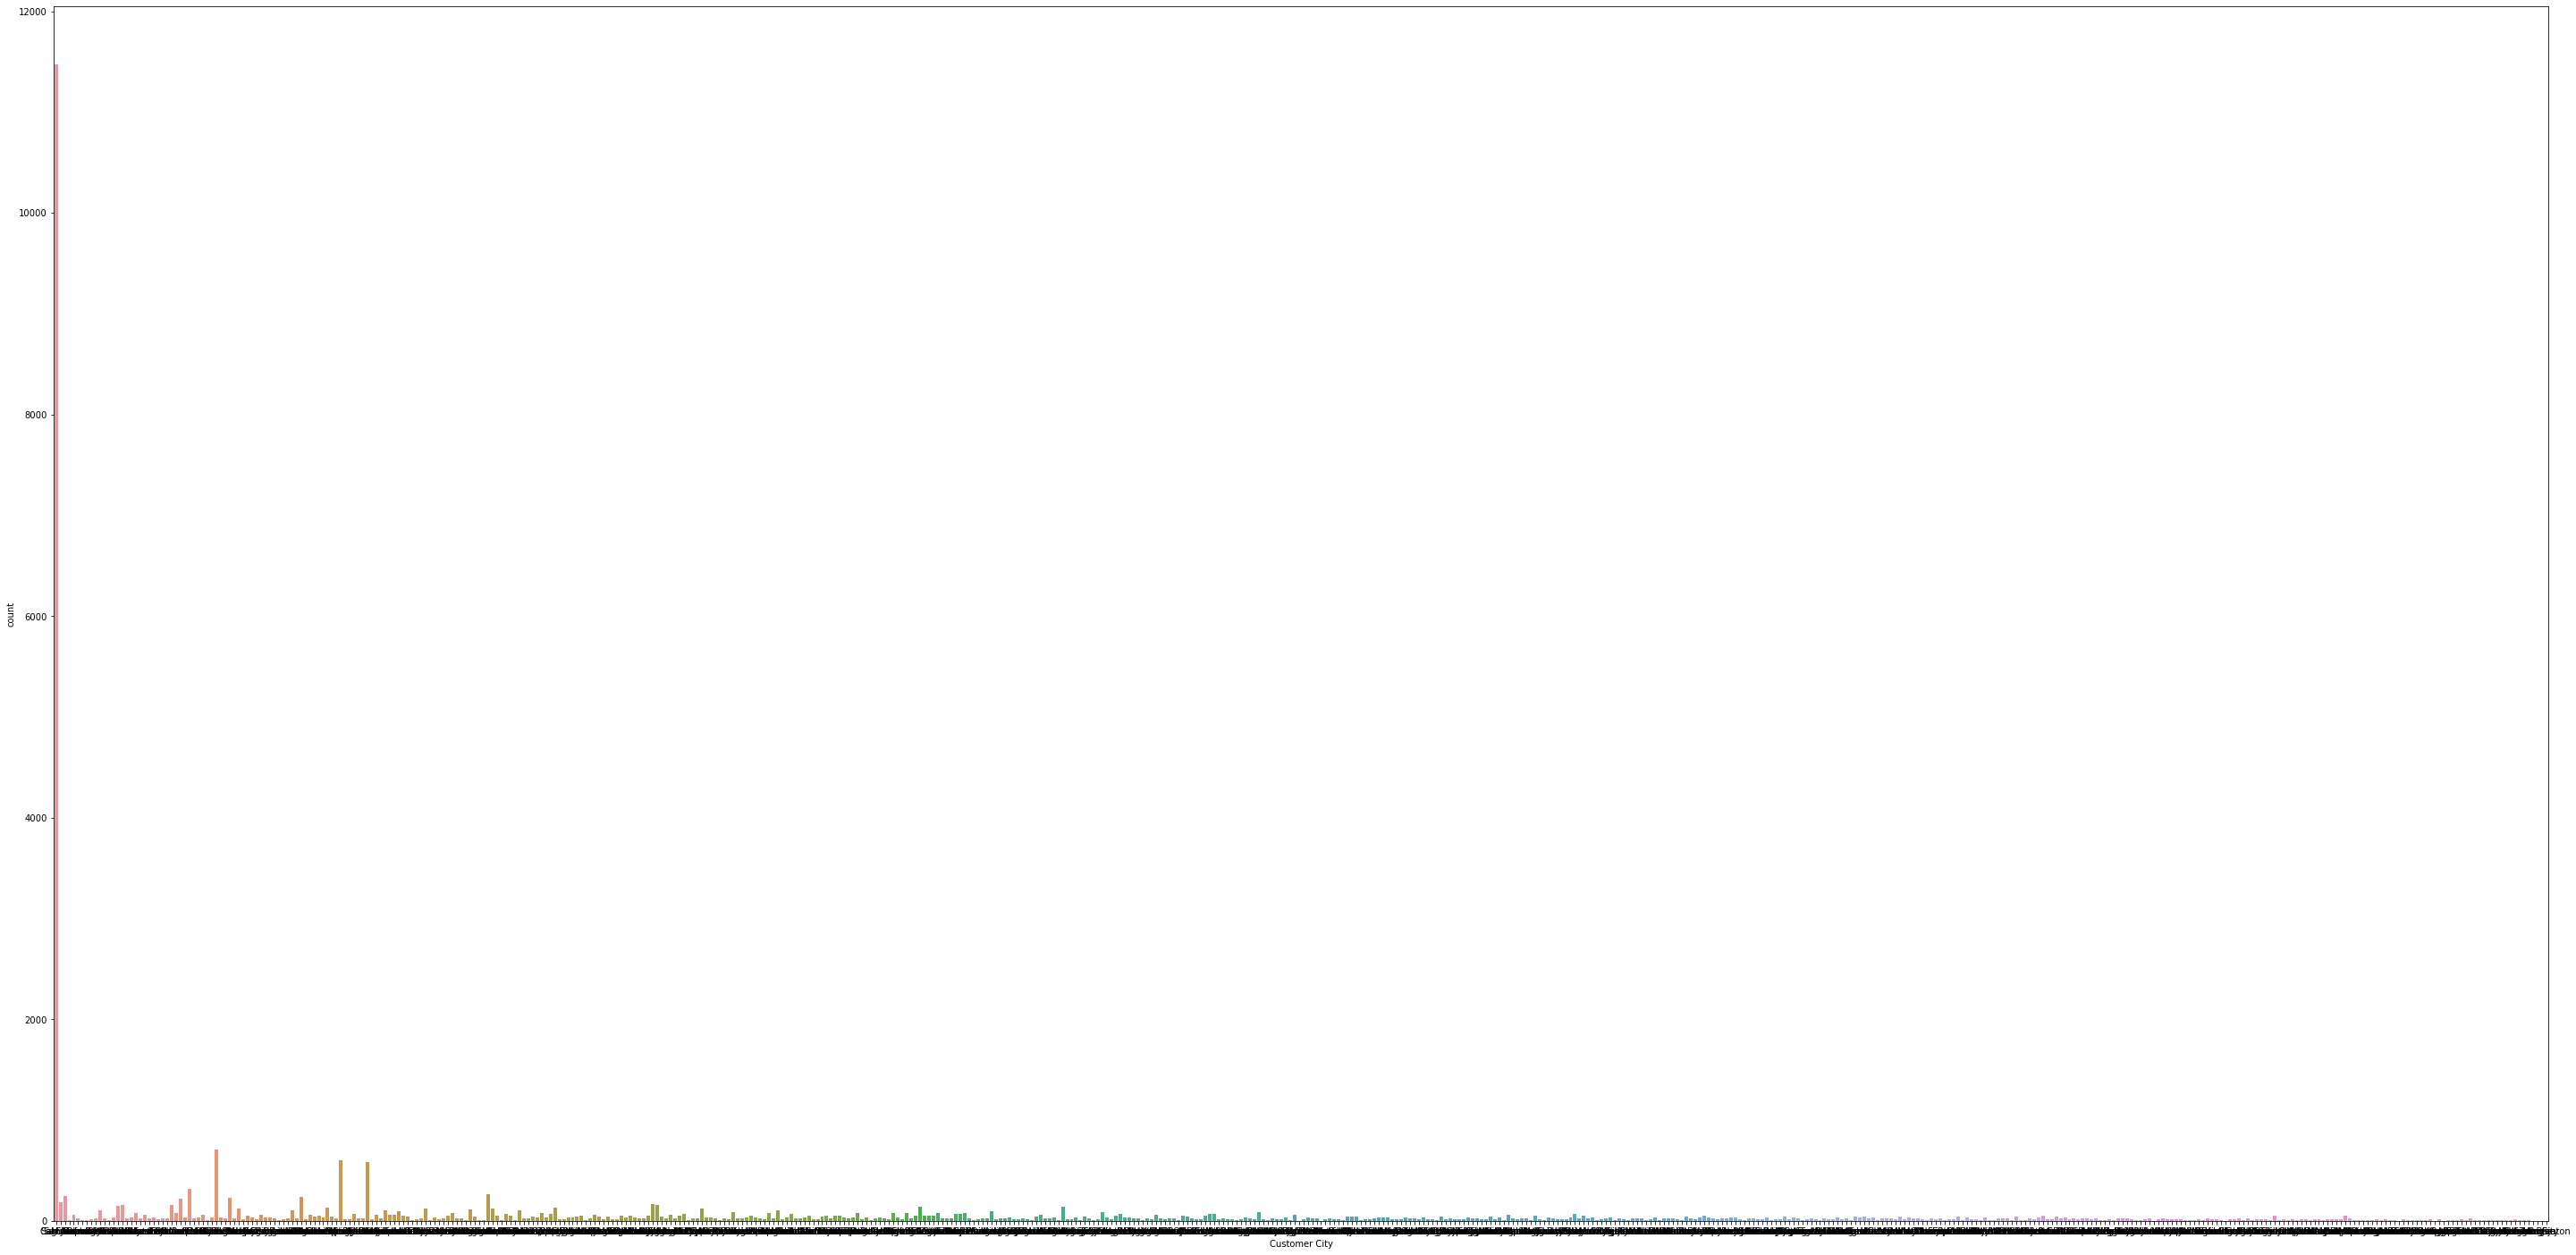

In [31]:
plt.figure(figsize=(50,25))
sns.countplot(df_cat.iloc[:,3])

<AxesSubplot:xlabel='Customer Country', ylabel='count'>

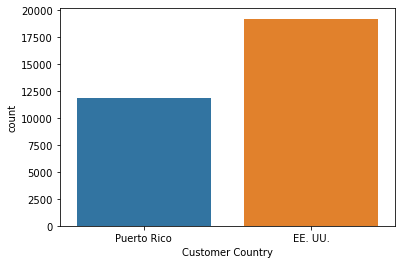

In [32]:
sns.countplot(df_cat.iloc[:,4])

<AxesSubplot:xlabel='Customer Segment', ylabel='count'>

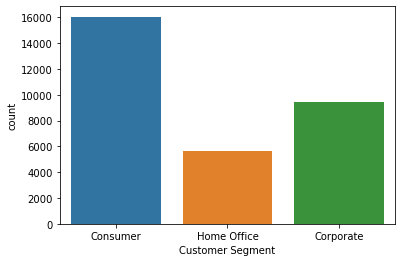

In [33]:
sns.countplot(df_cat.iloc[:,5])

<AxesSubplot:xlabel='Customer State', ylabel='count'>

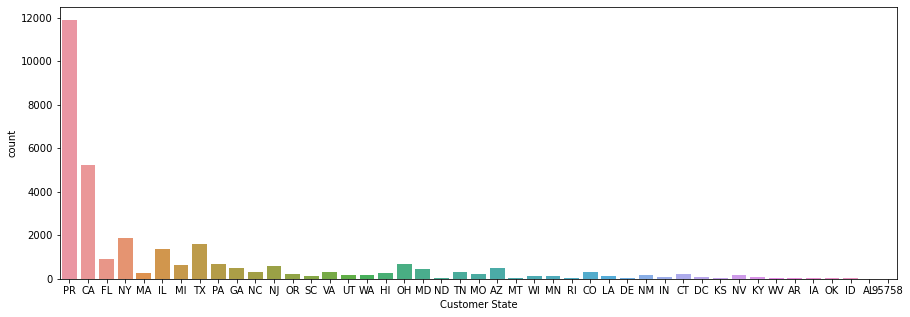

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(df_cat.iloc[:,6])

<AxesSubplot:xlabel='Department Name', ylabel='count'>

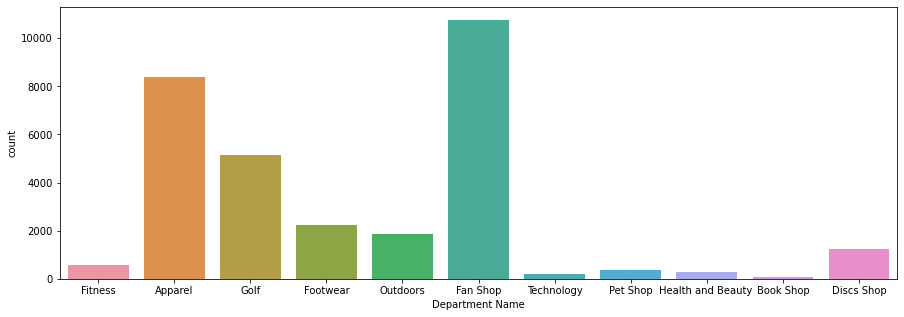

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(df_cat.iloc[:,7])

<AxesSubplot:xlabel='Order City', ylabel='count'>

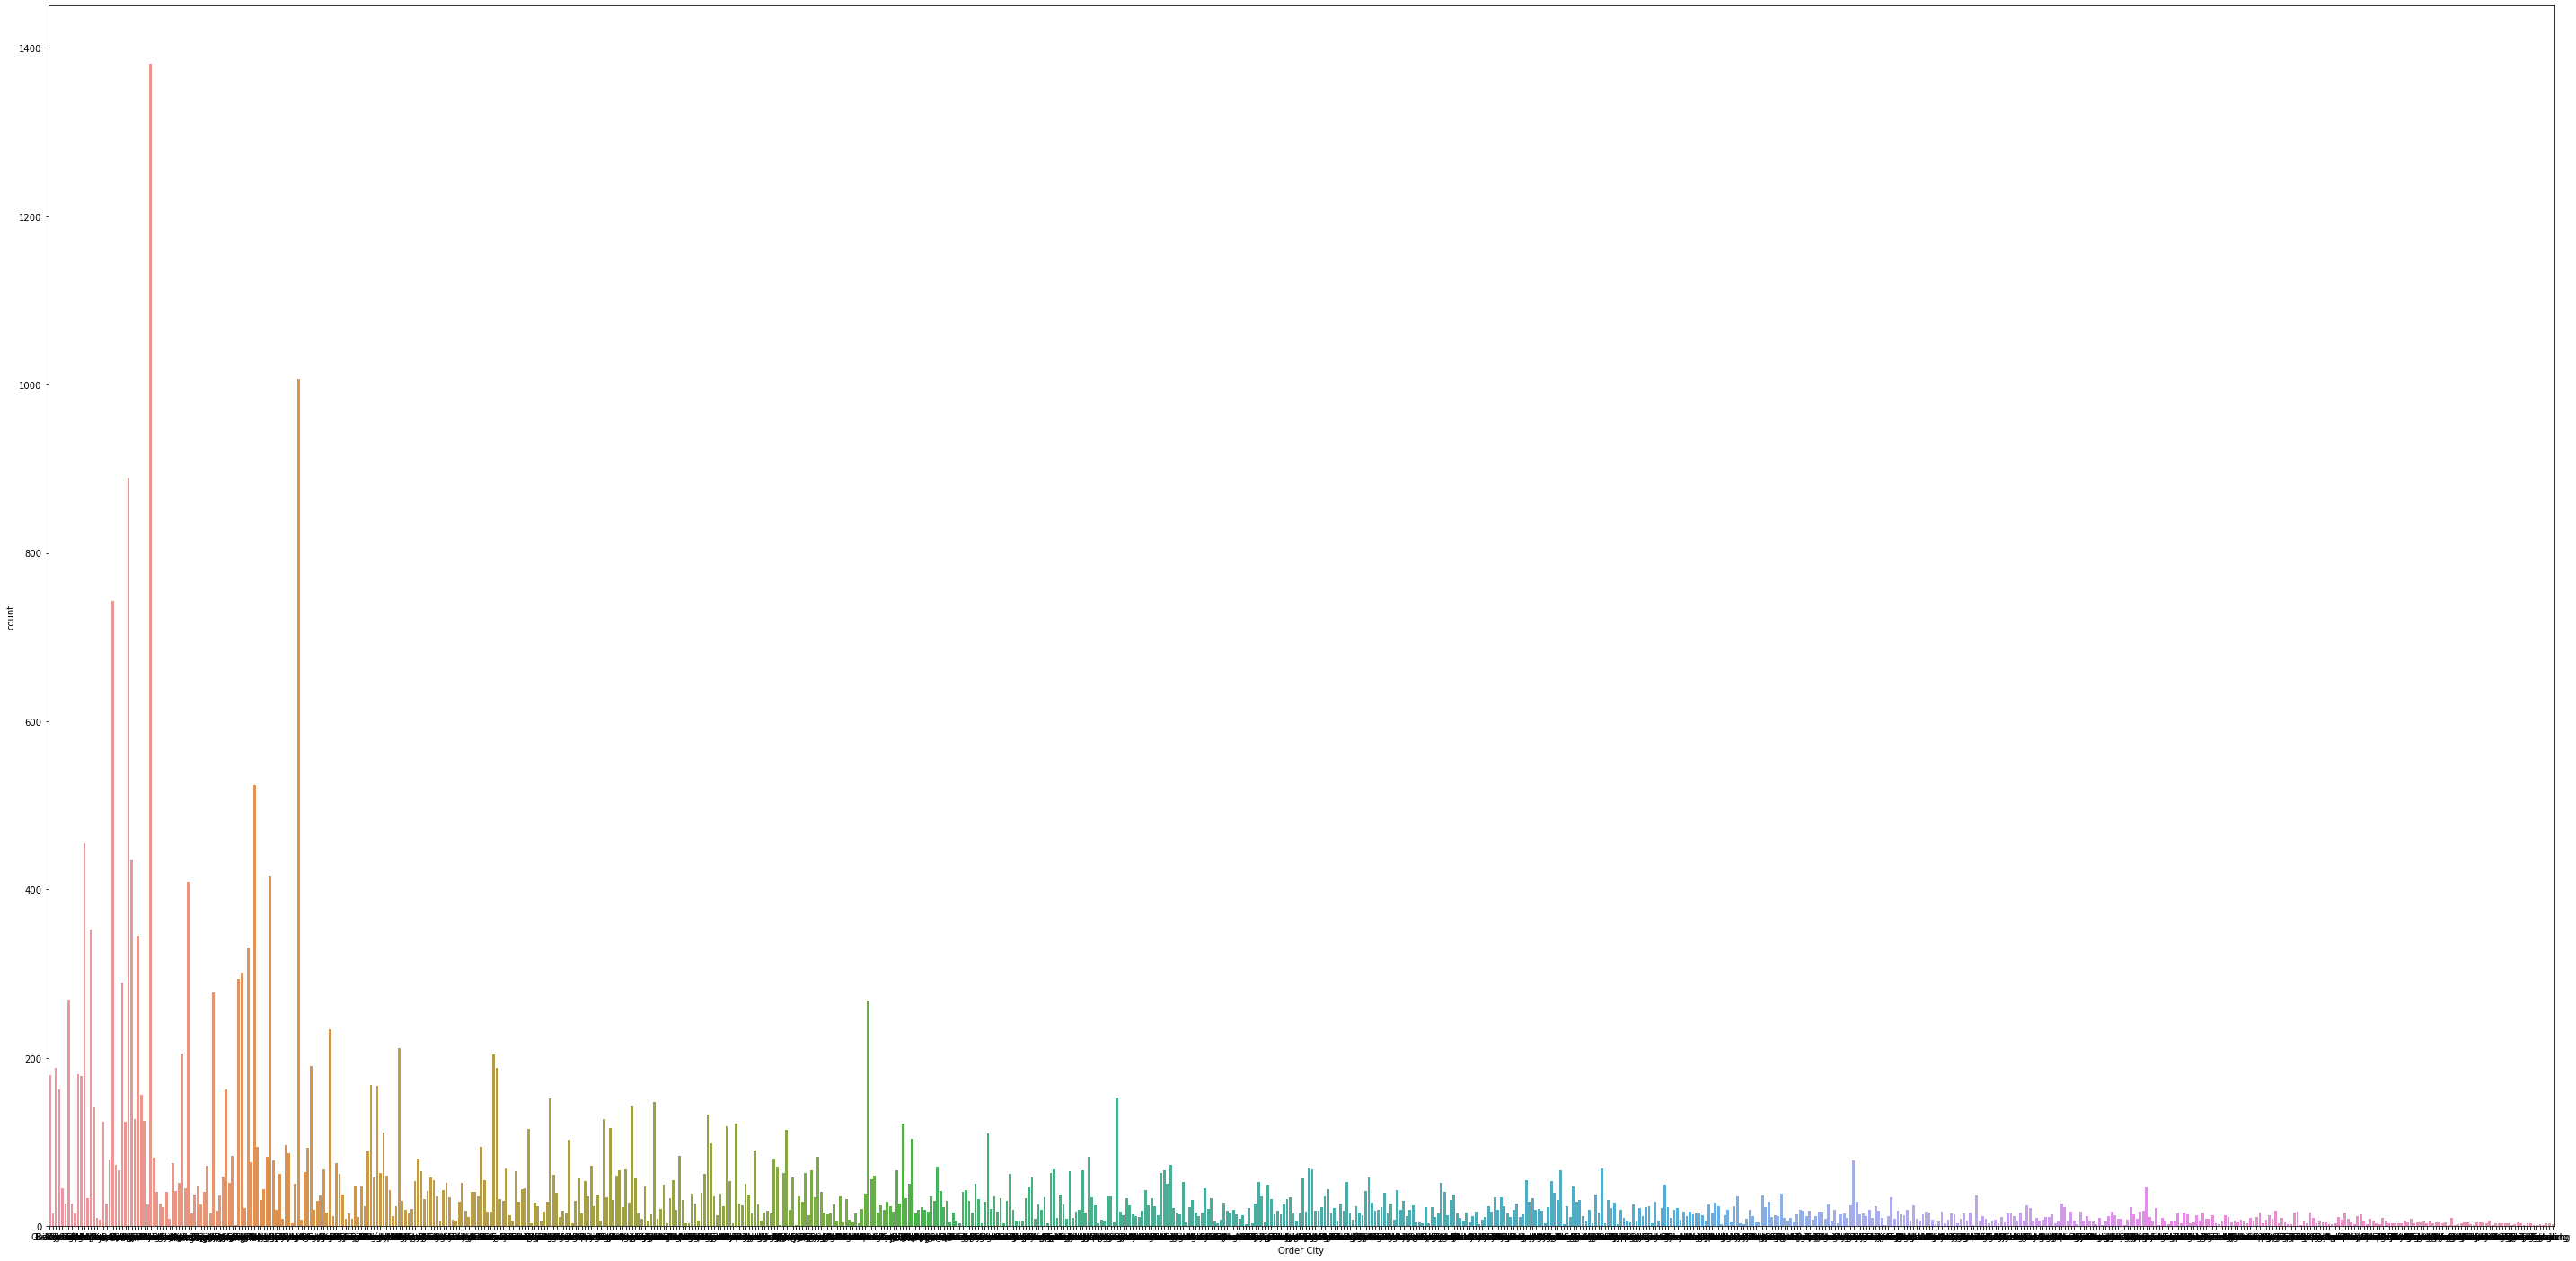

In [36]:
plt.figure(figsize=(50,25))
sns.countplot(df_cat.iloc[:,8])

<AxesSubplot:xlabel='Order Country', ylabel='count'>

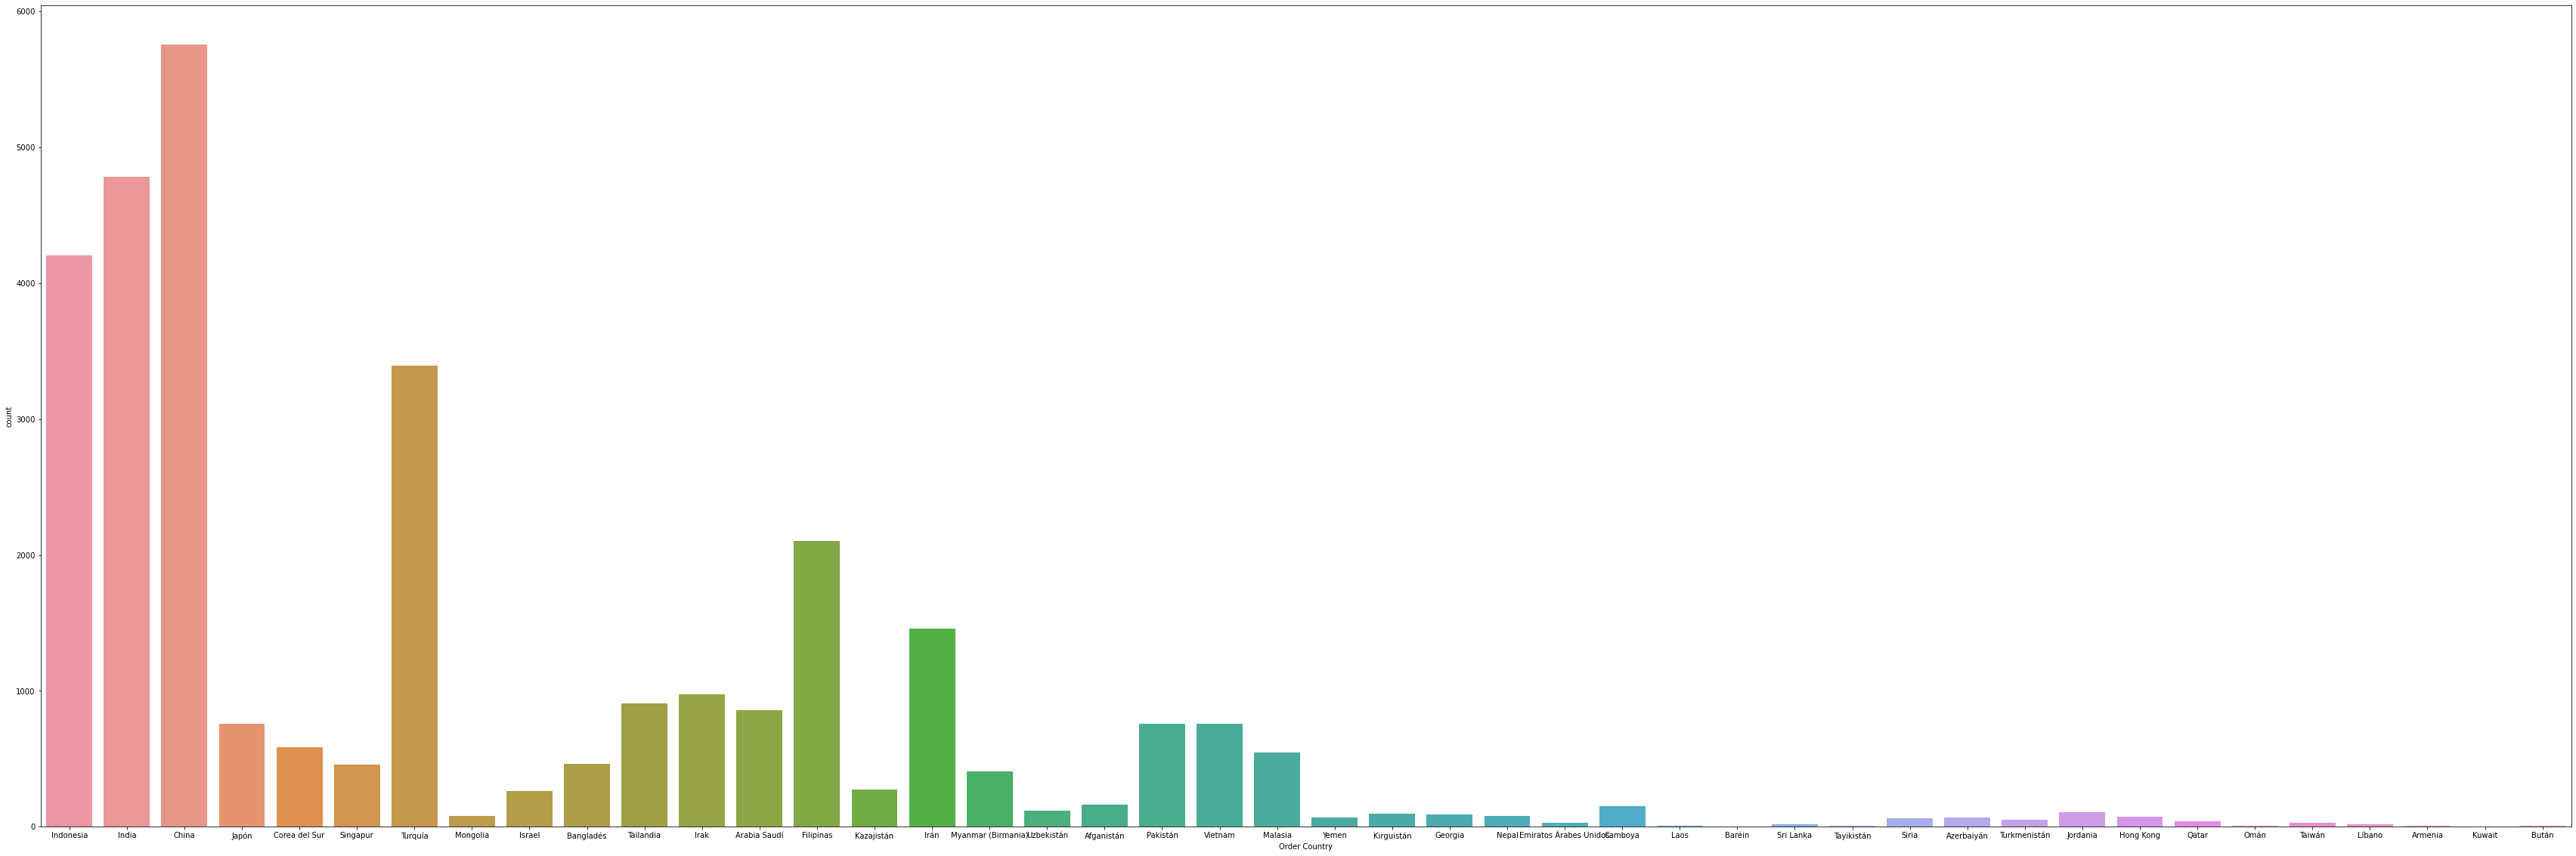

In [37]:
plt.figure(figsize=(60,20))
sns.countplot(df_cat.iloc[:,9])

<AxesSubplot:xlabel='Order Region', ylabel='count'>

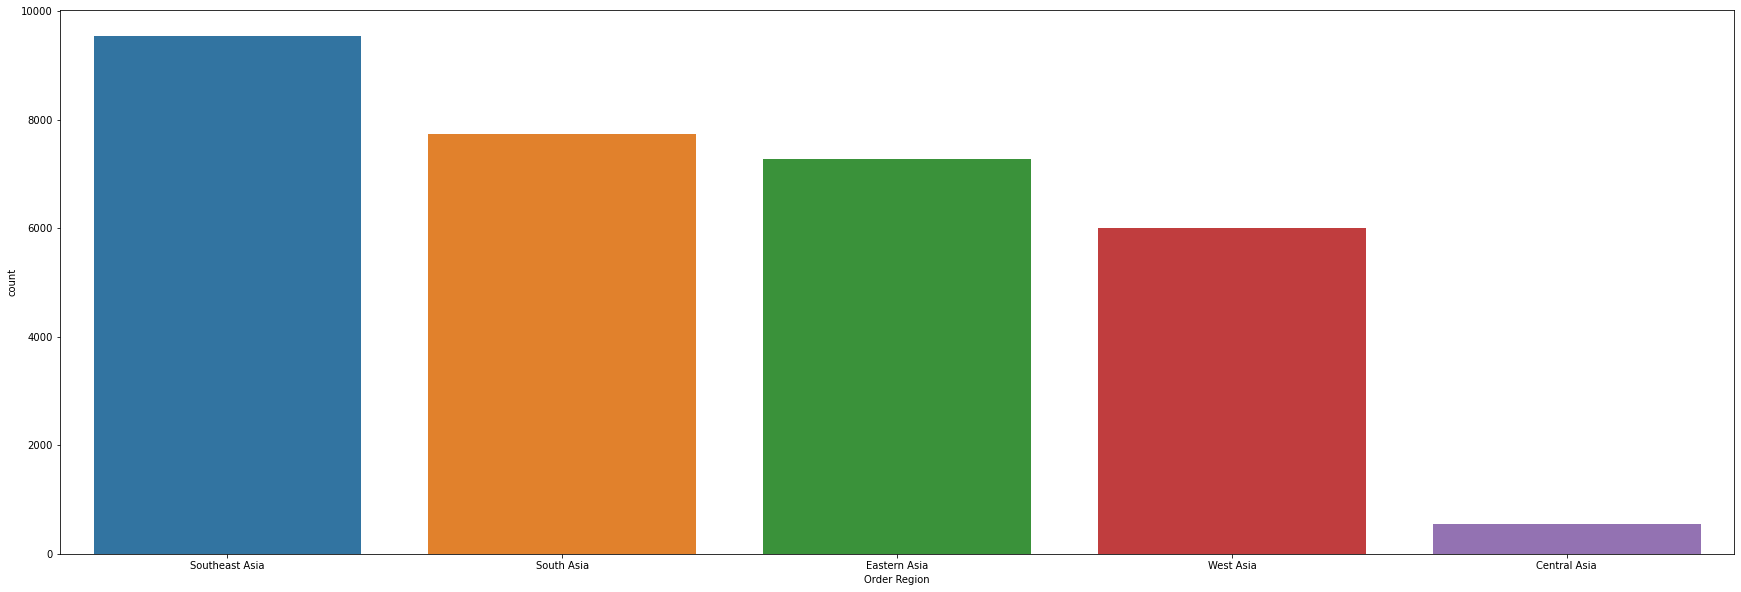

In [38]:
plt.figure(figsize=(30,10))
sns.countplot(df_cat.iloc[:,11])

<AxesSubplot:xlabel='Order State', ylabel='count'>

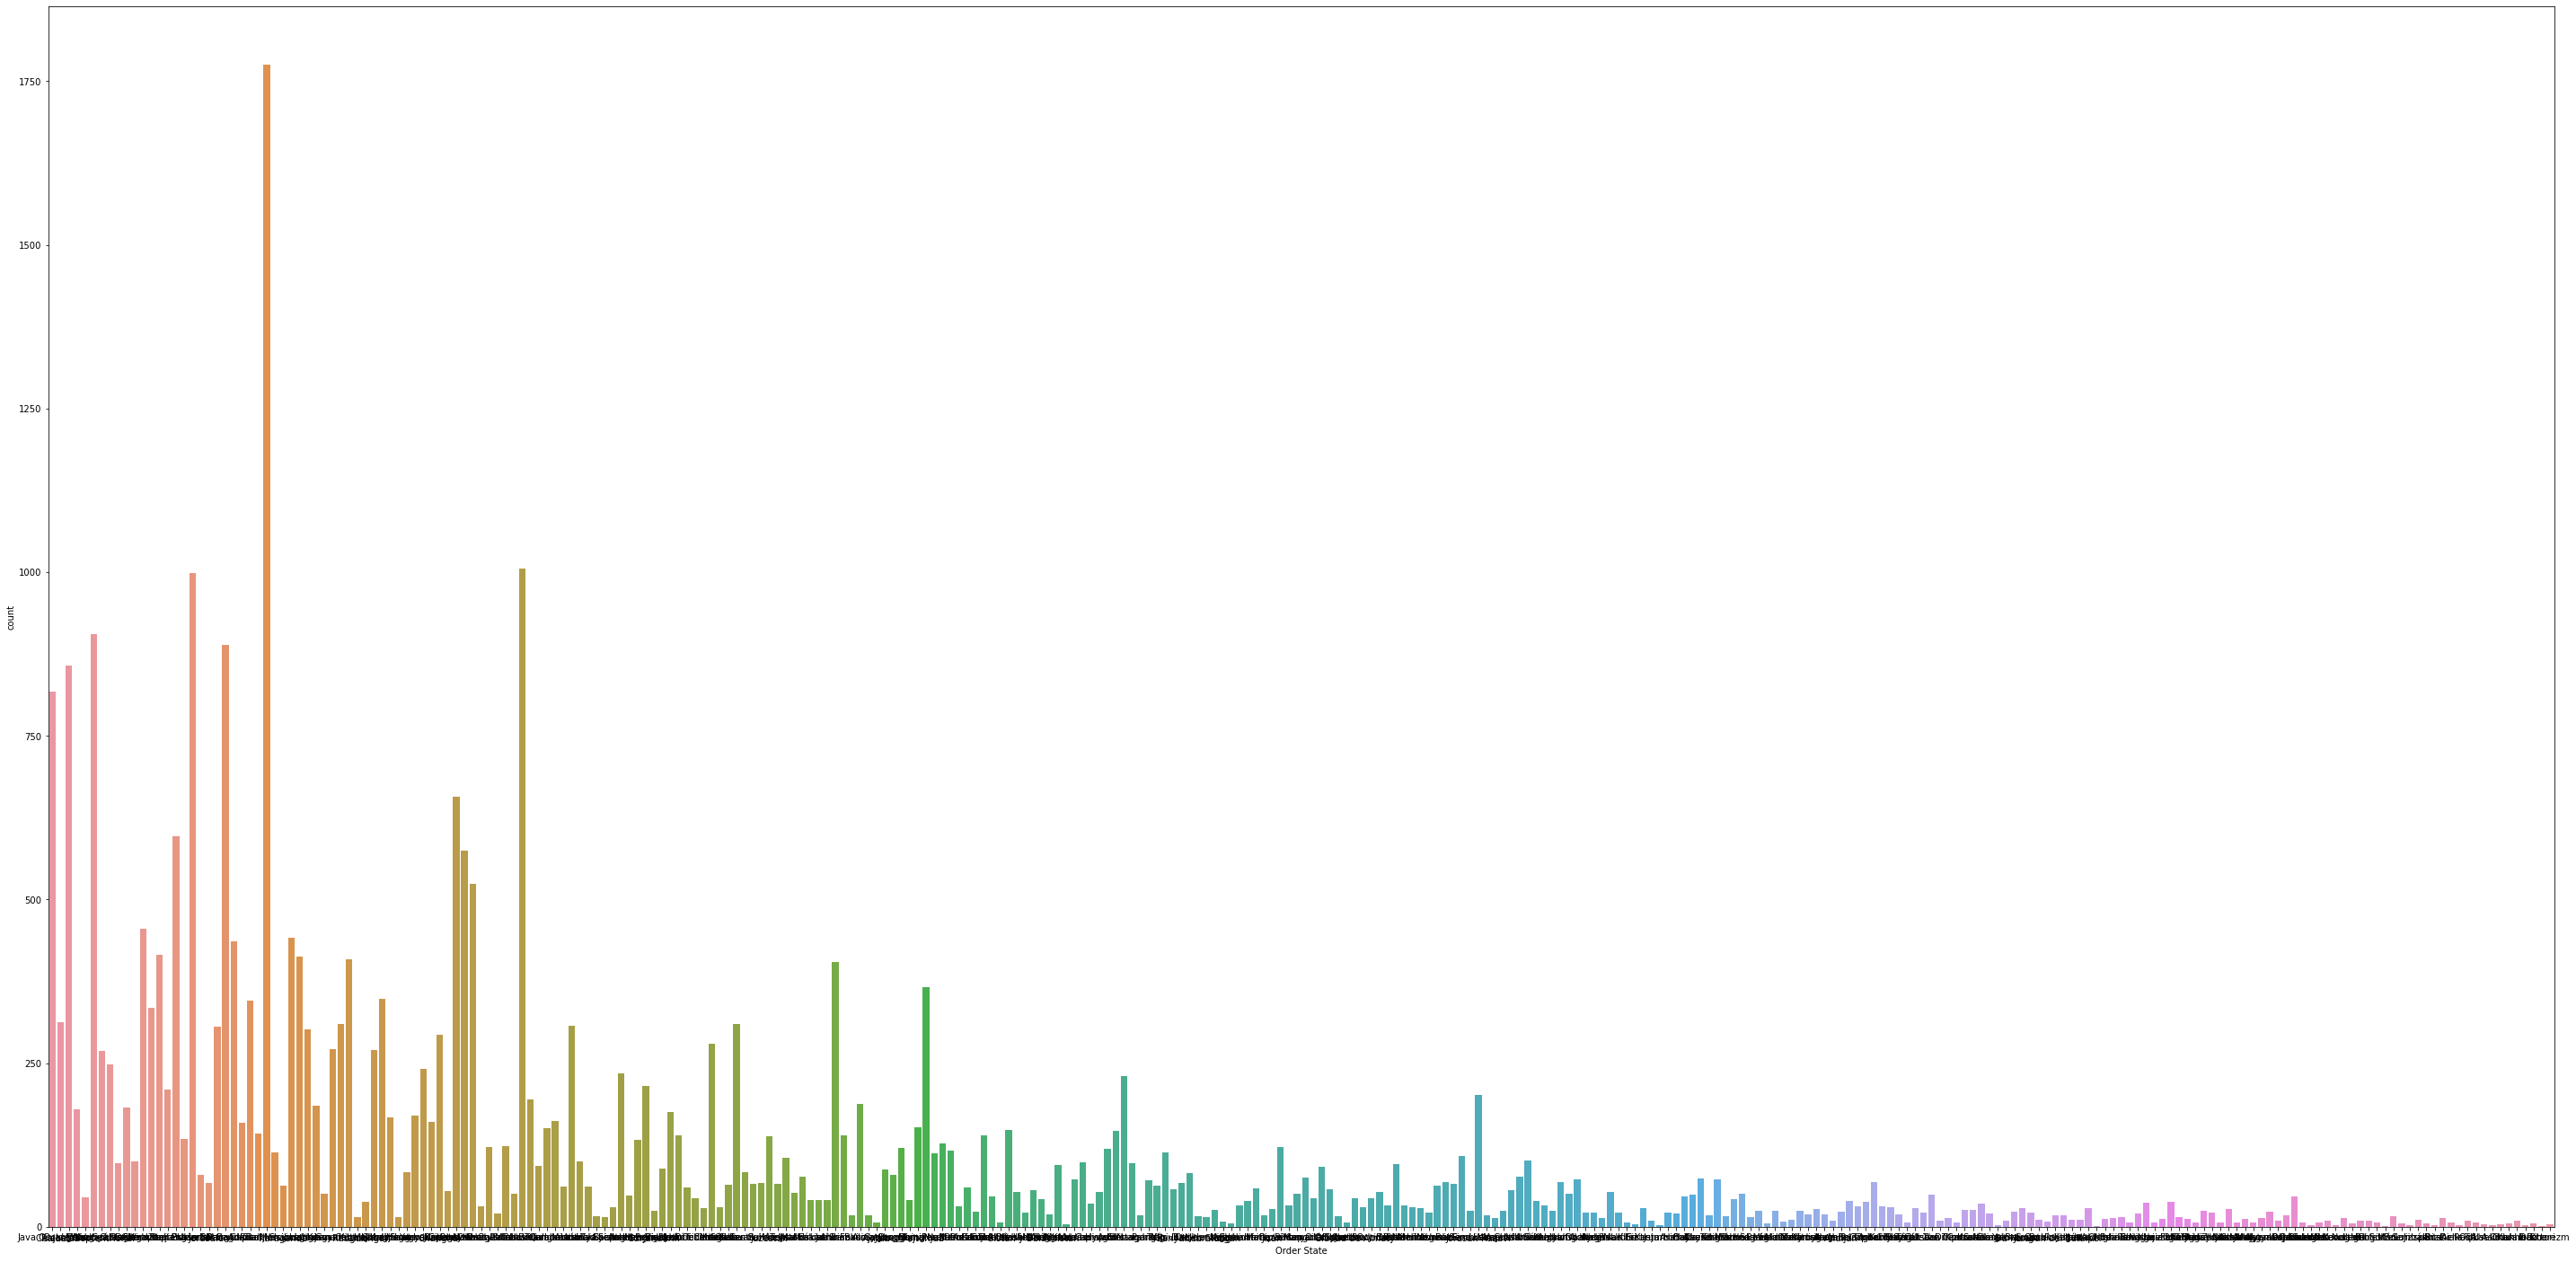

In [39]:
plt.figure(figsize=(50,25))
sns.countplot(df_cat.iloc[:,12])

<AxesSubplot:xlabel='Order Status', ylabel='count'>

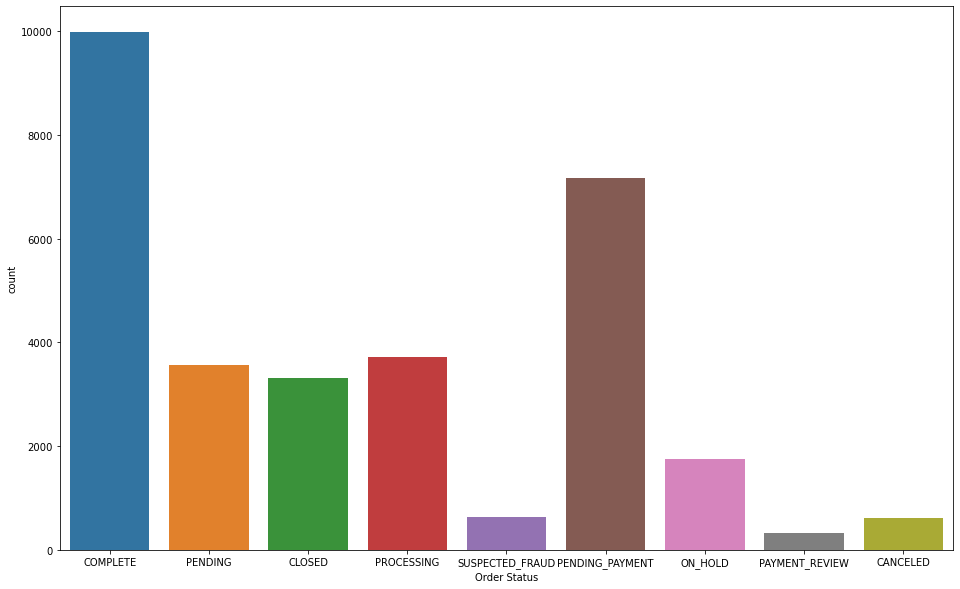

In [40]:
plt.figure(figsize=(16,10))
sns.countplot(df_cat.iloc[:,13])

<AxesSubplot:xlabel='Product Name', ylabel='count'>

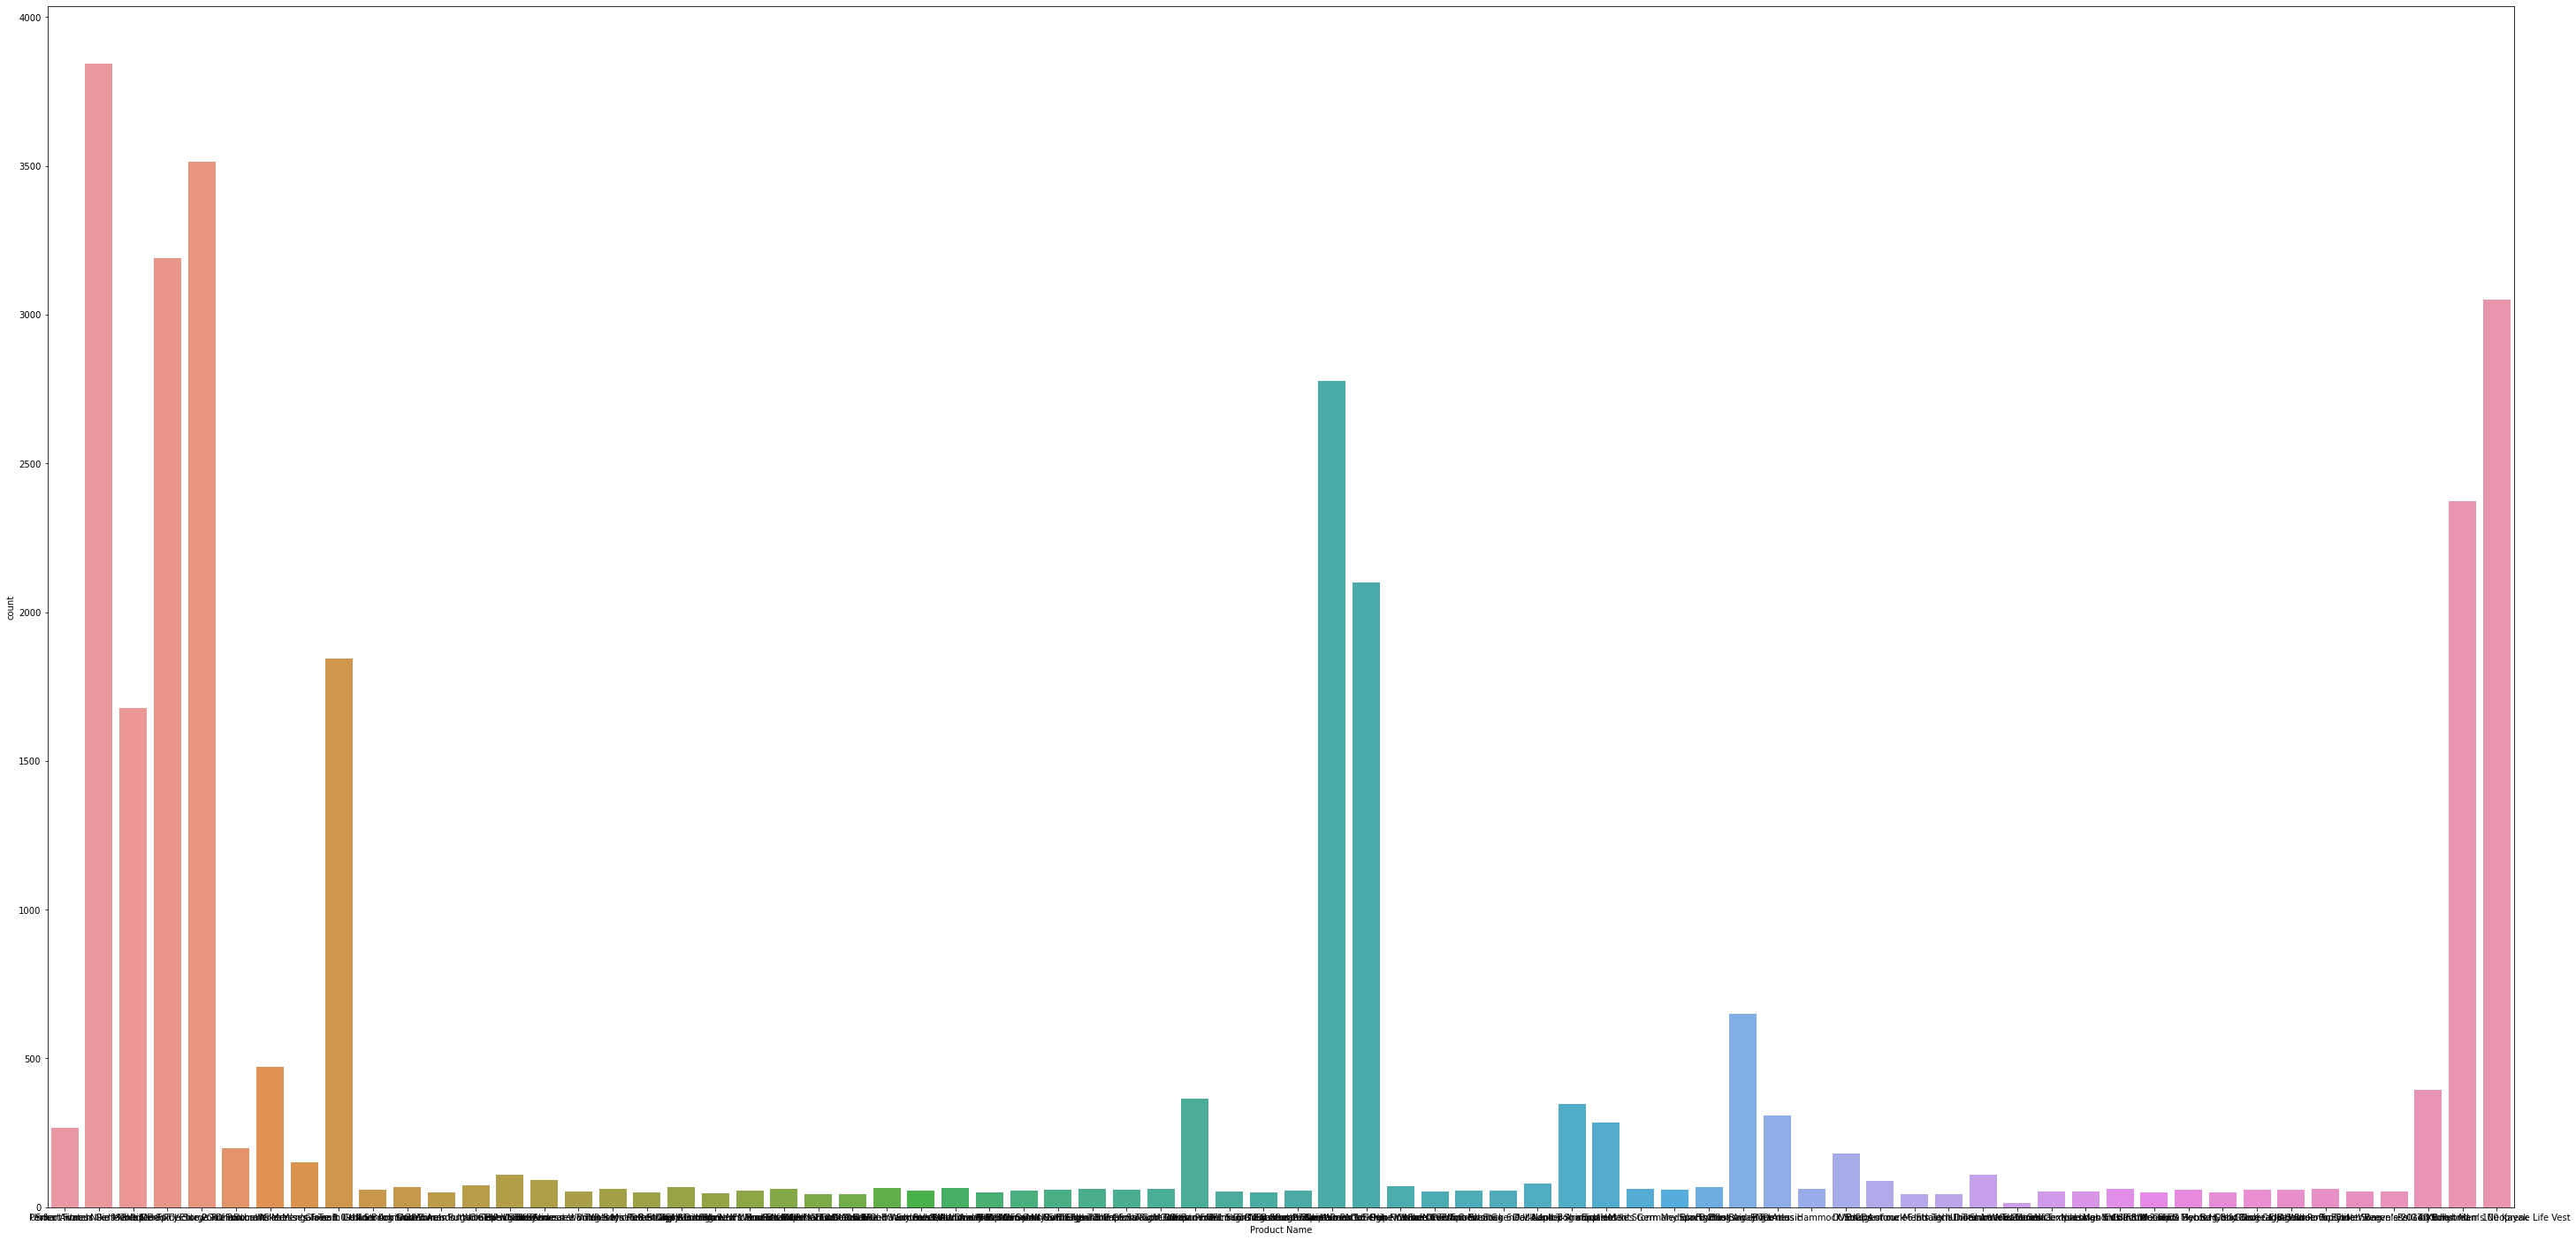

In [41]:
plt.figure(figsize=(50,25))
sns.countplot(df_cat.iloc[:,14])

<AxesSubplot:xlabel='Shipping Mode', ylabel='count'>

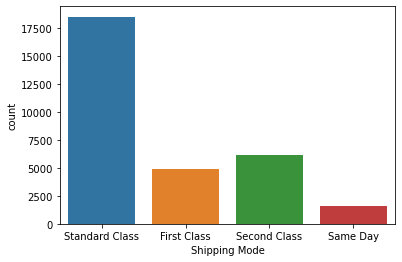

In [42]:
sns.countplot(df_cat.iloc[:,16])

## Bivariate analysis for categorical variable with target variable

<AxesSubplot:xlabel='Type', ylabel='count'>

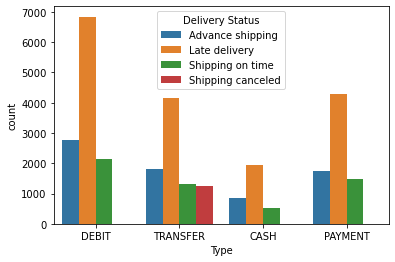

In [43]:
sns.countplot(df_cat.iloc[:,0],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Delivery Status', ylabel='count'>

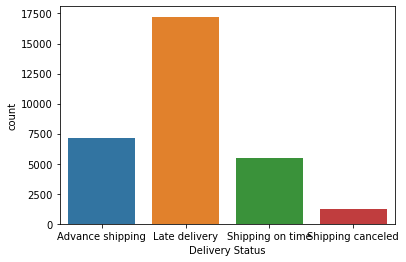

In [44]:
sns.countplot(df_cat.iloc[:,1])

<AxesSubplot:xlabel='Category Name', ylabel='count'>

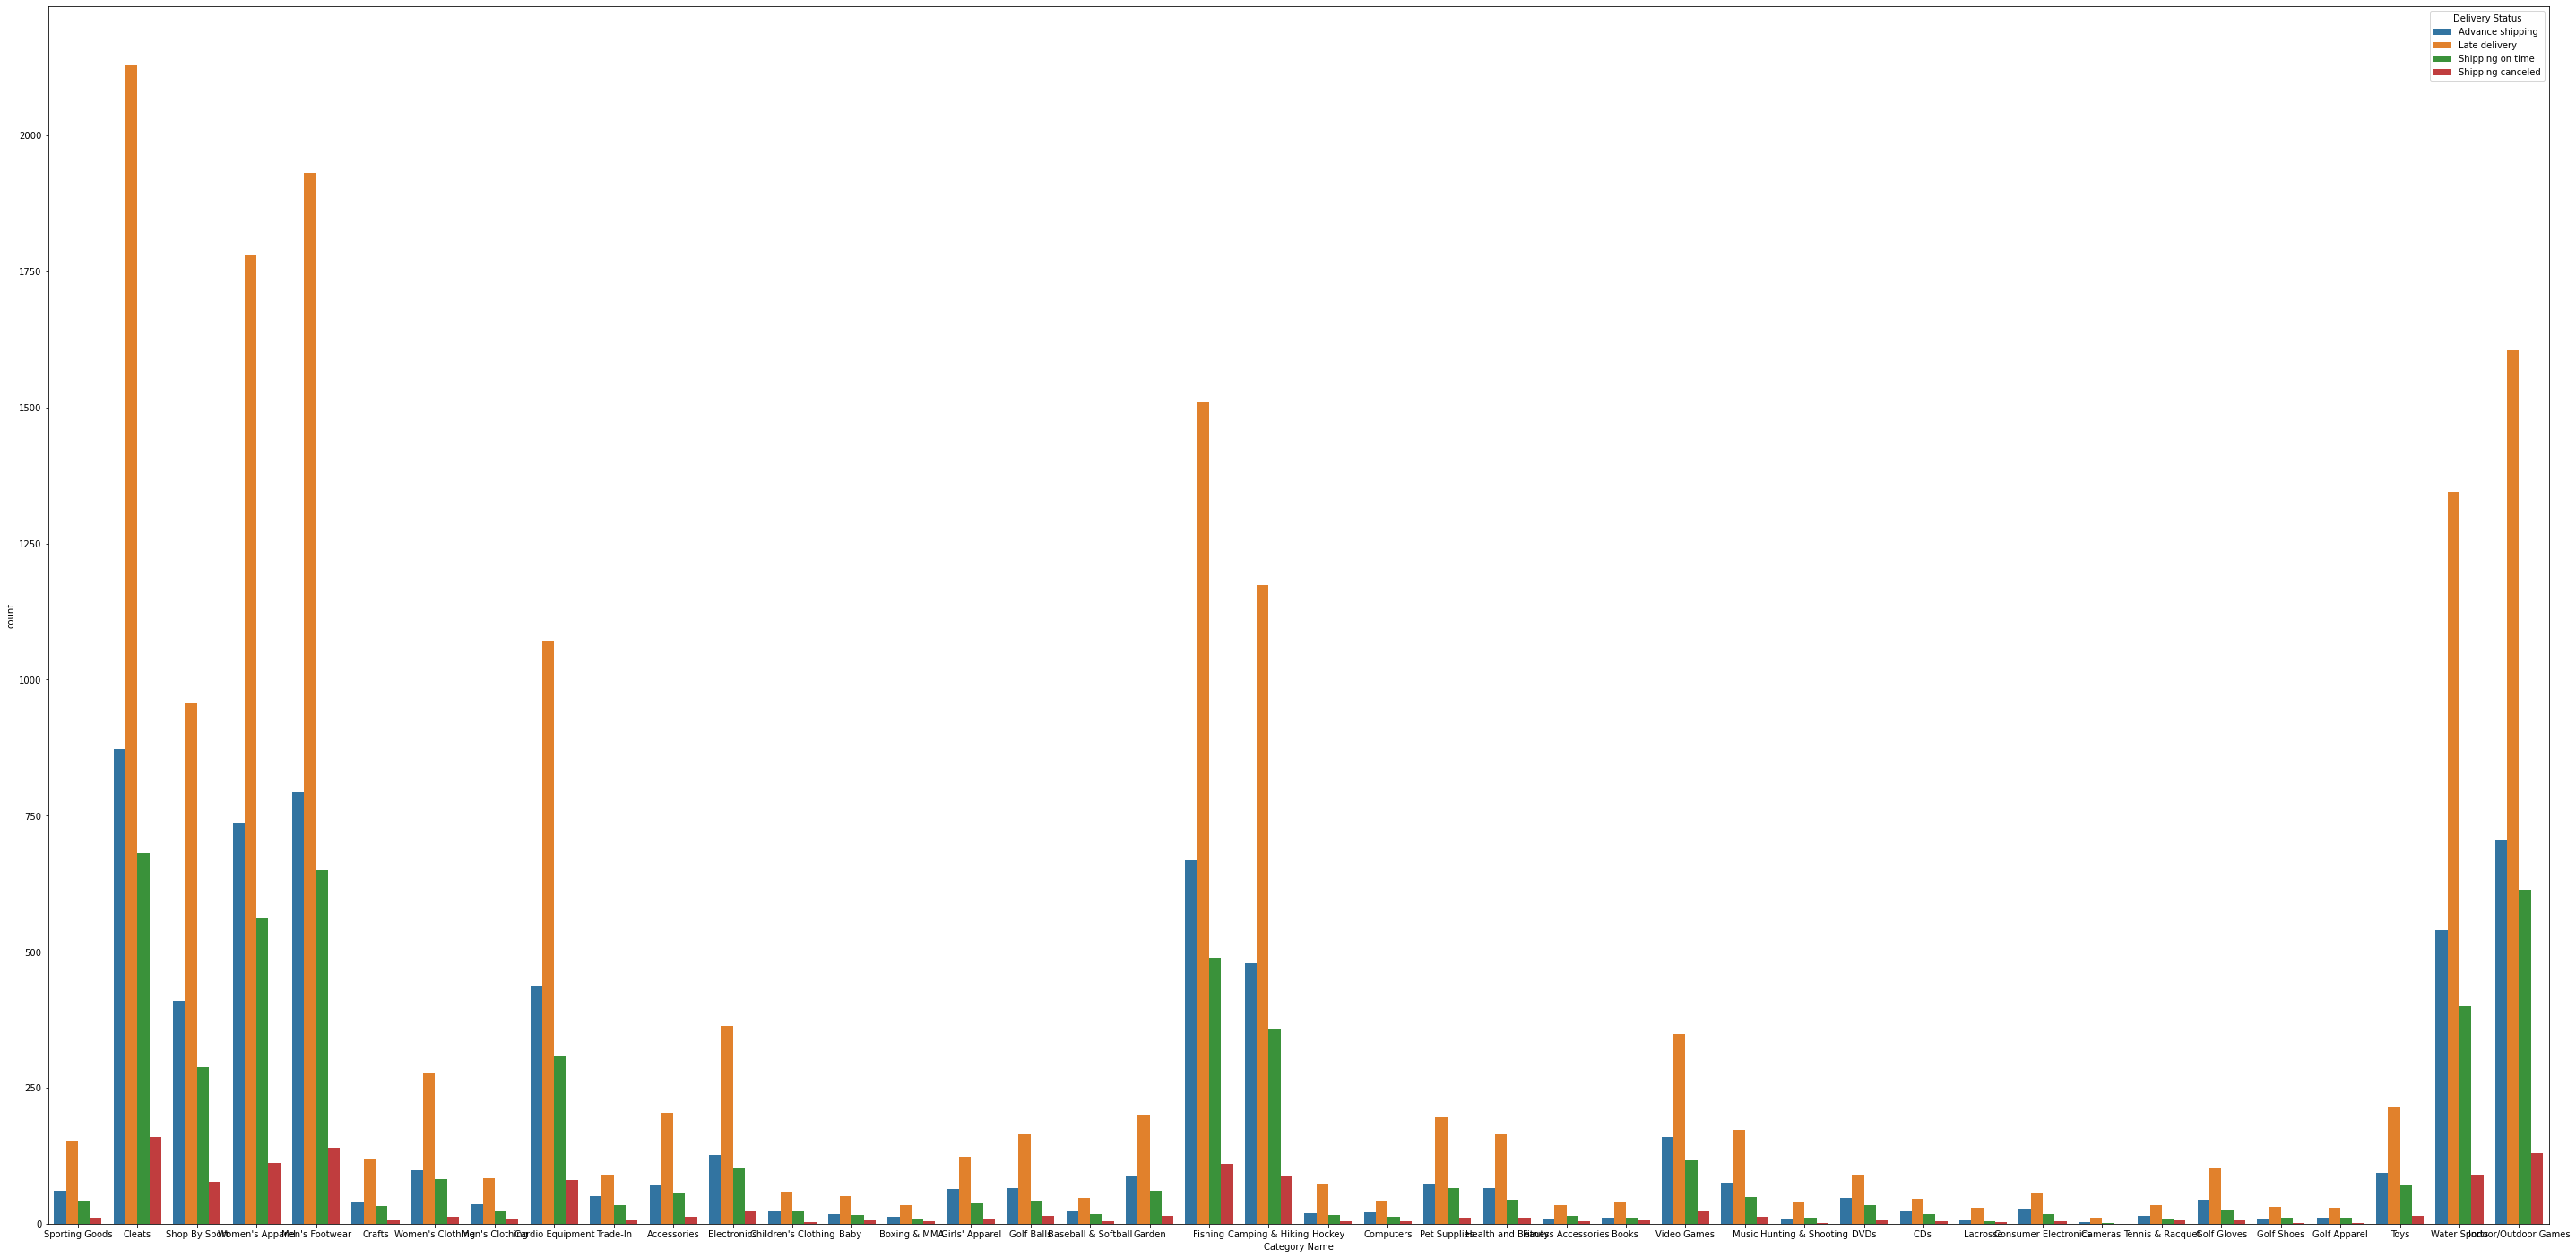

In [45]:
plt.figure(figsize=(50,25))
sns.countplot(df_cat.iloc[:,2],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Customer City', ylabel='count'>

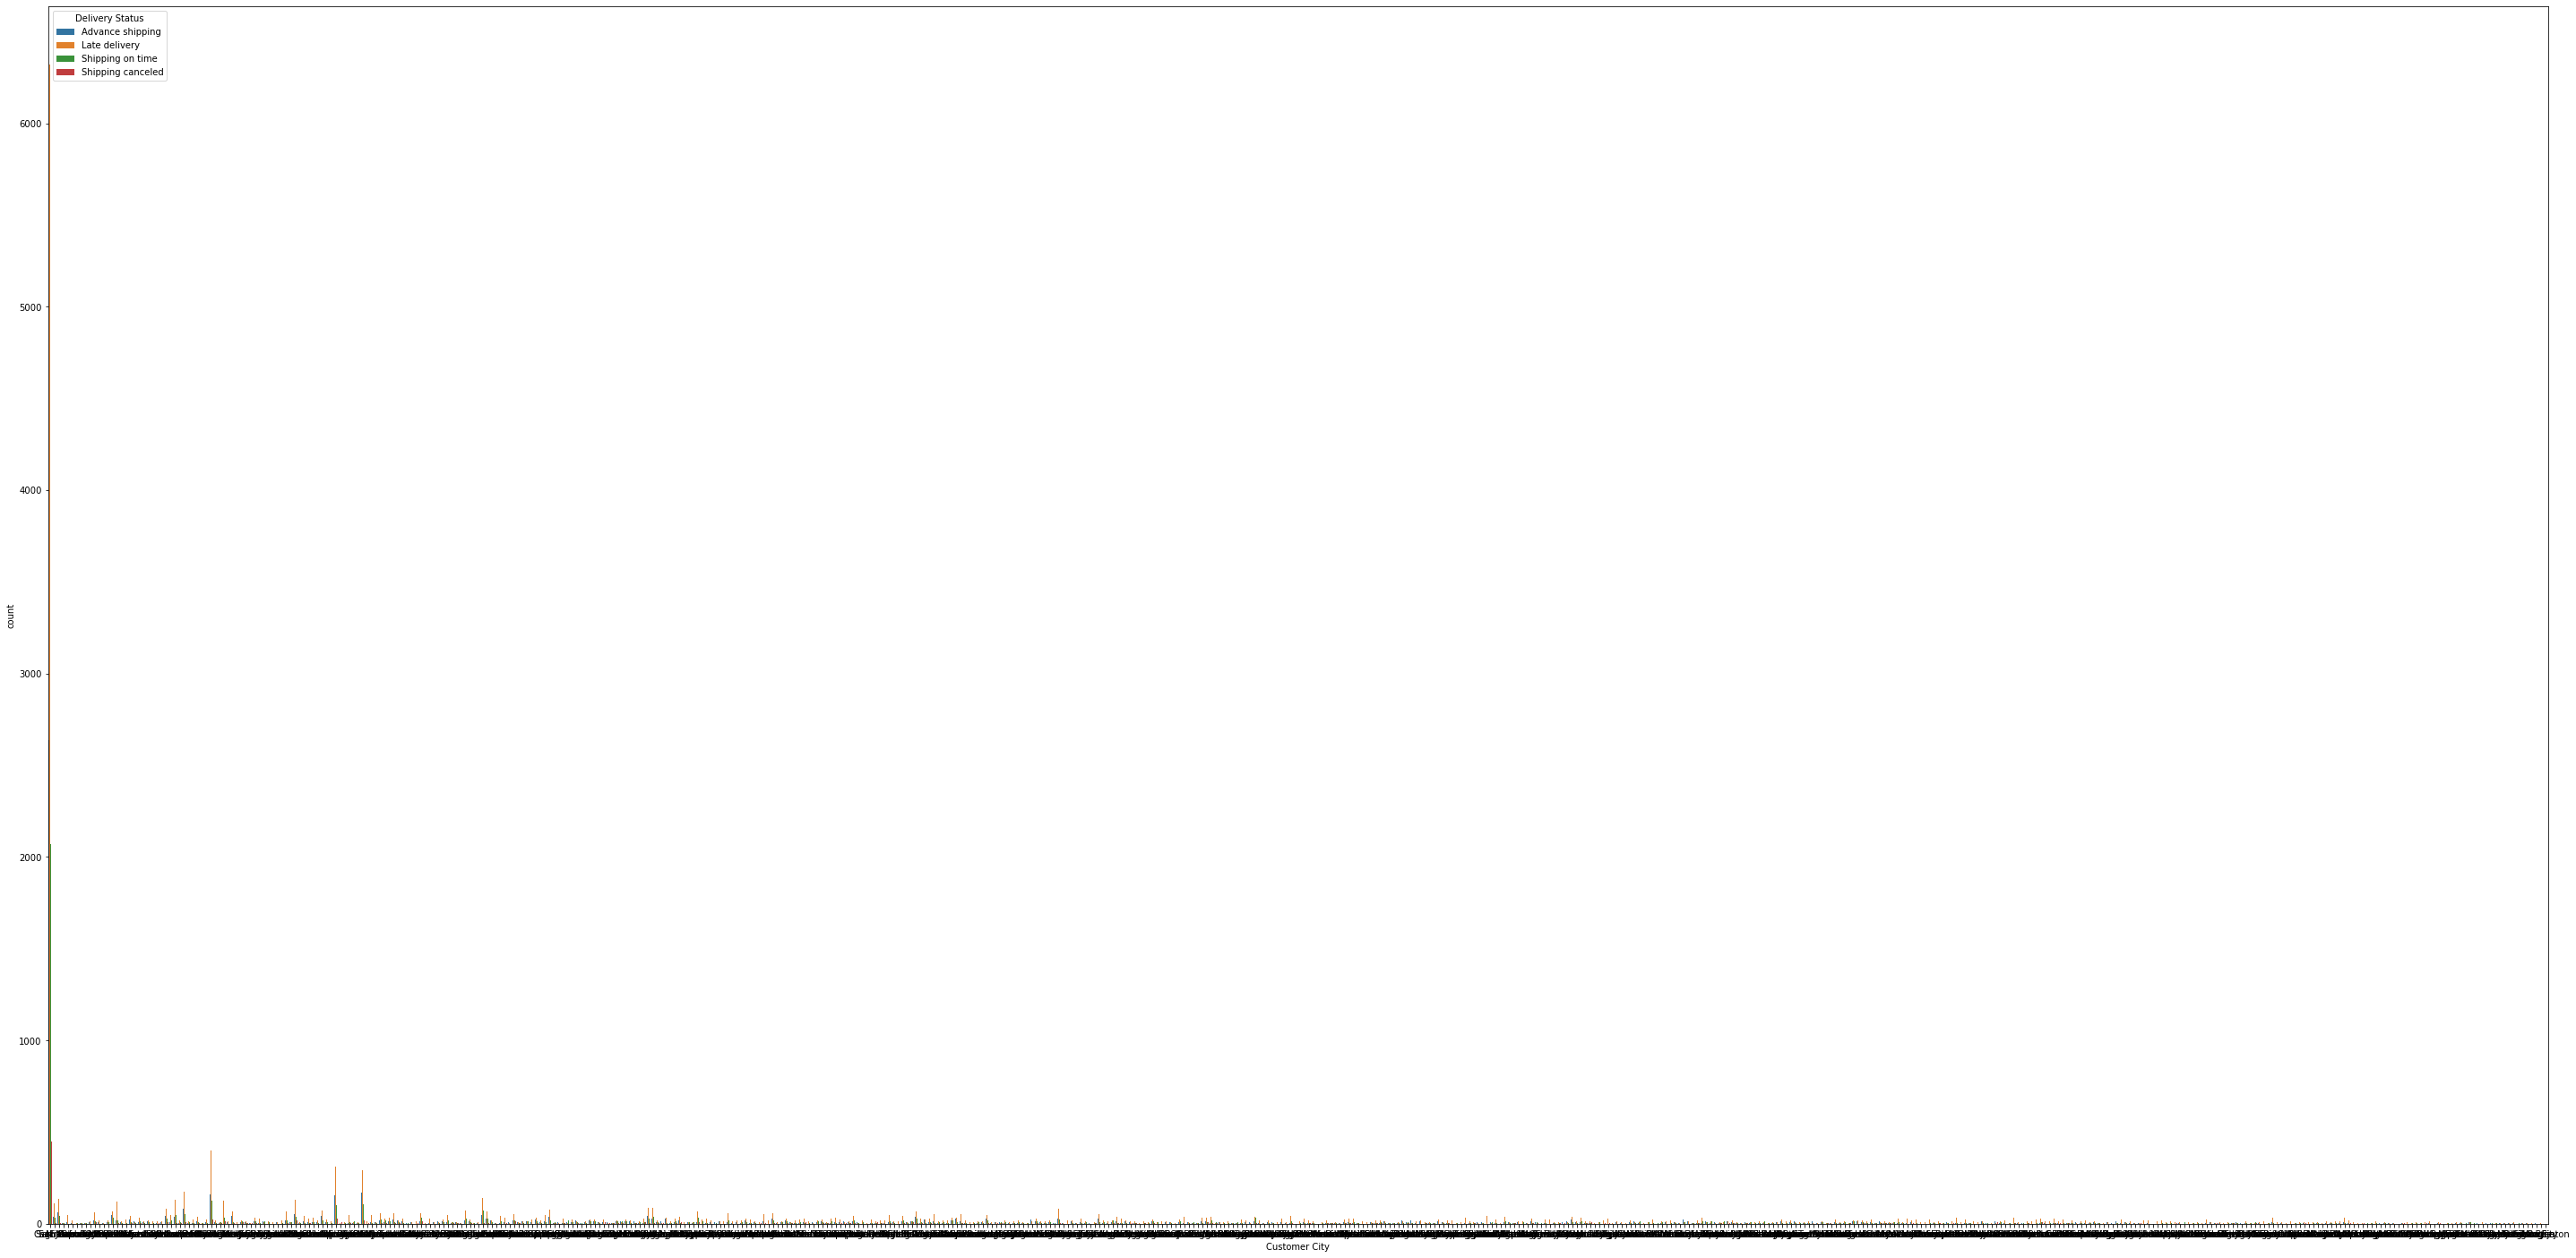

In [46]:
plt.figure(figsize=(50,25))
sns.countplot(df_cat.iloc[:,3],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Customer Country', ylabel='count'>

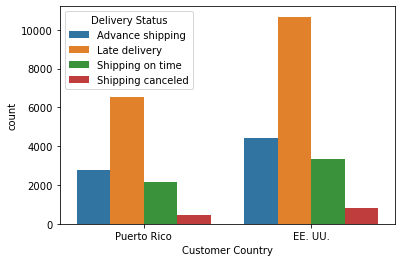

In [47]:

sns.countplot(df_cat.iloc[:,4],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Customer Segment', ylabel='count'>

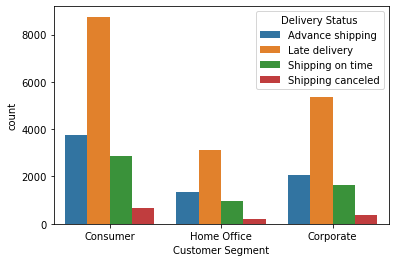

In [48]:

sns.countplot(df_cat.iloc[:,5],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Customer State', ylabel='count'>

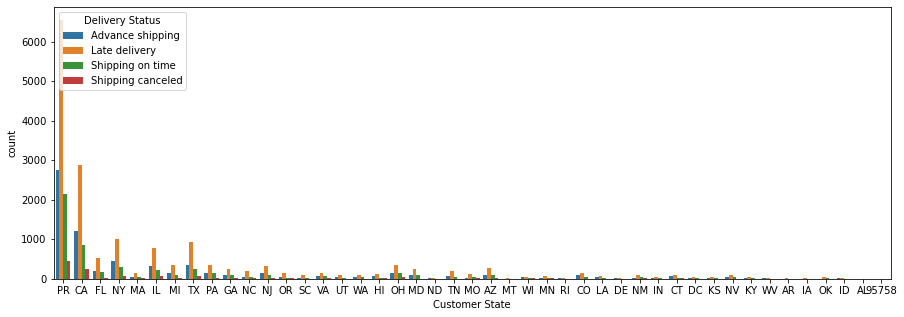

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(df_cat.iloc[:,6],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Department Name', ylabel='count'>

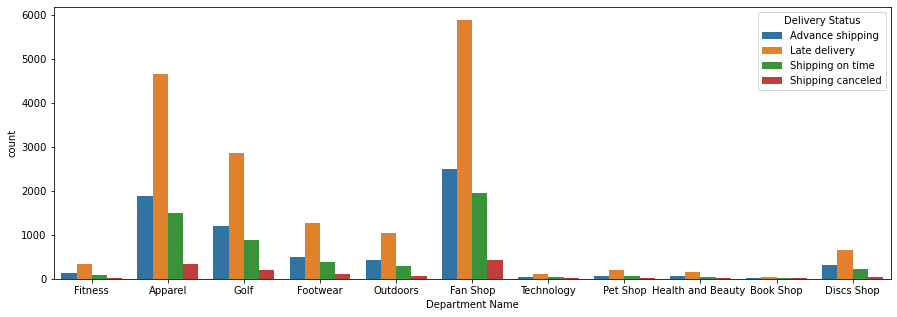

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(df_cat.iloc[:,7],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Order City', ylabel='count'>

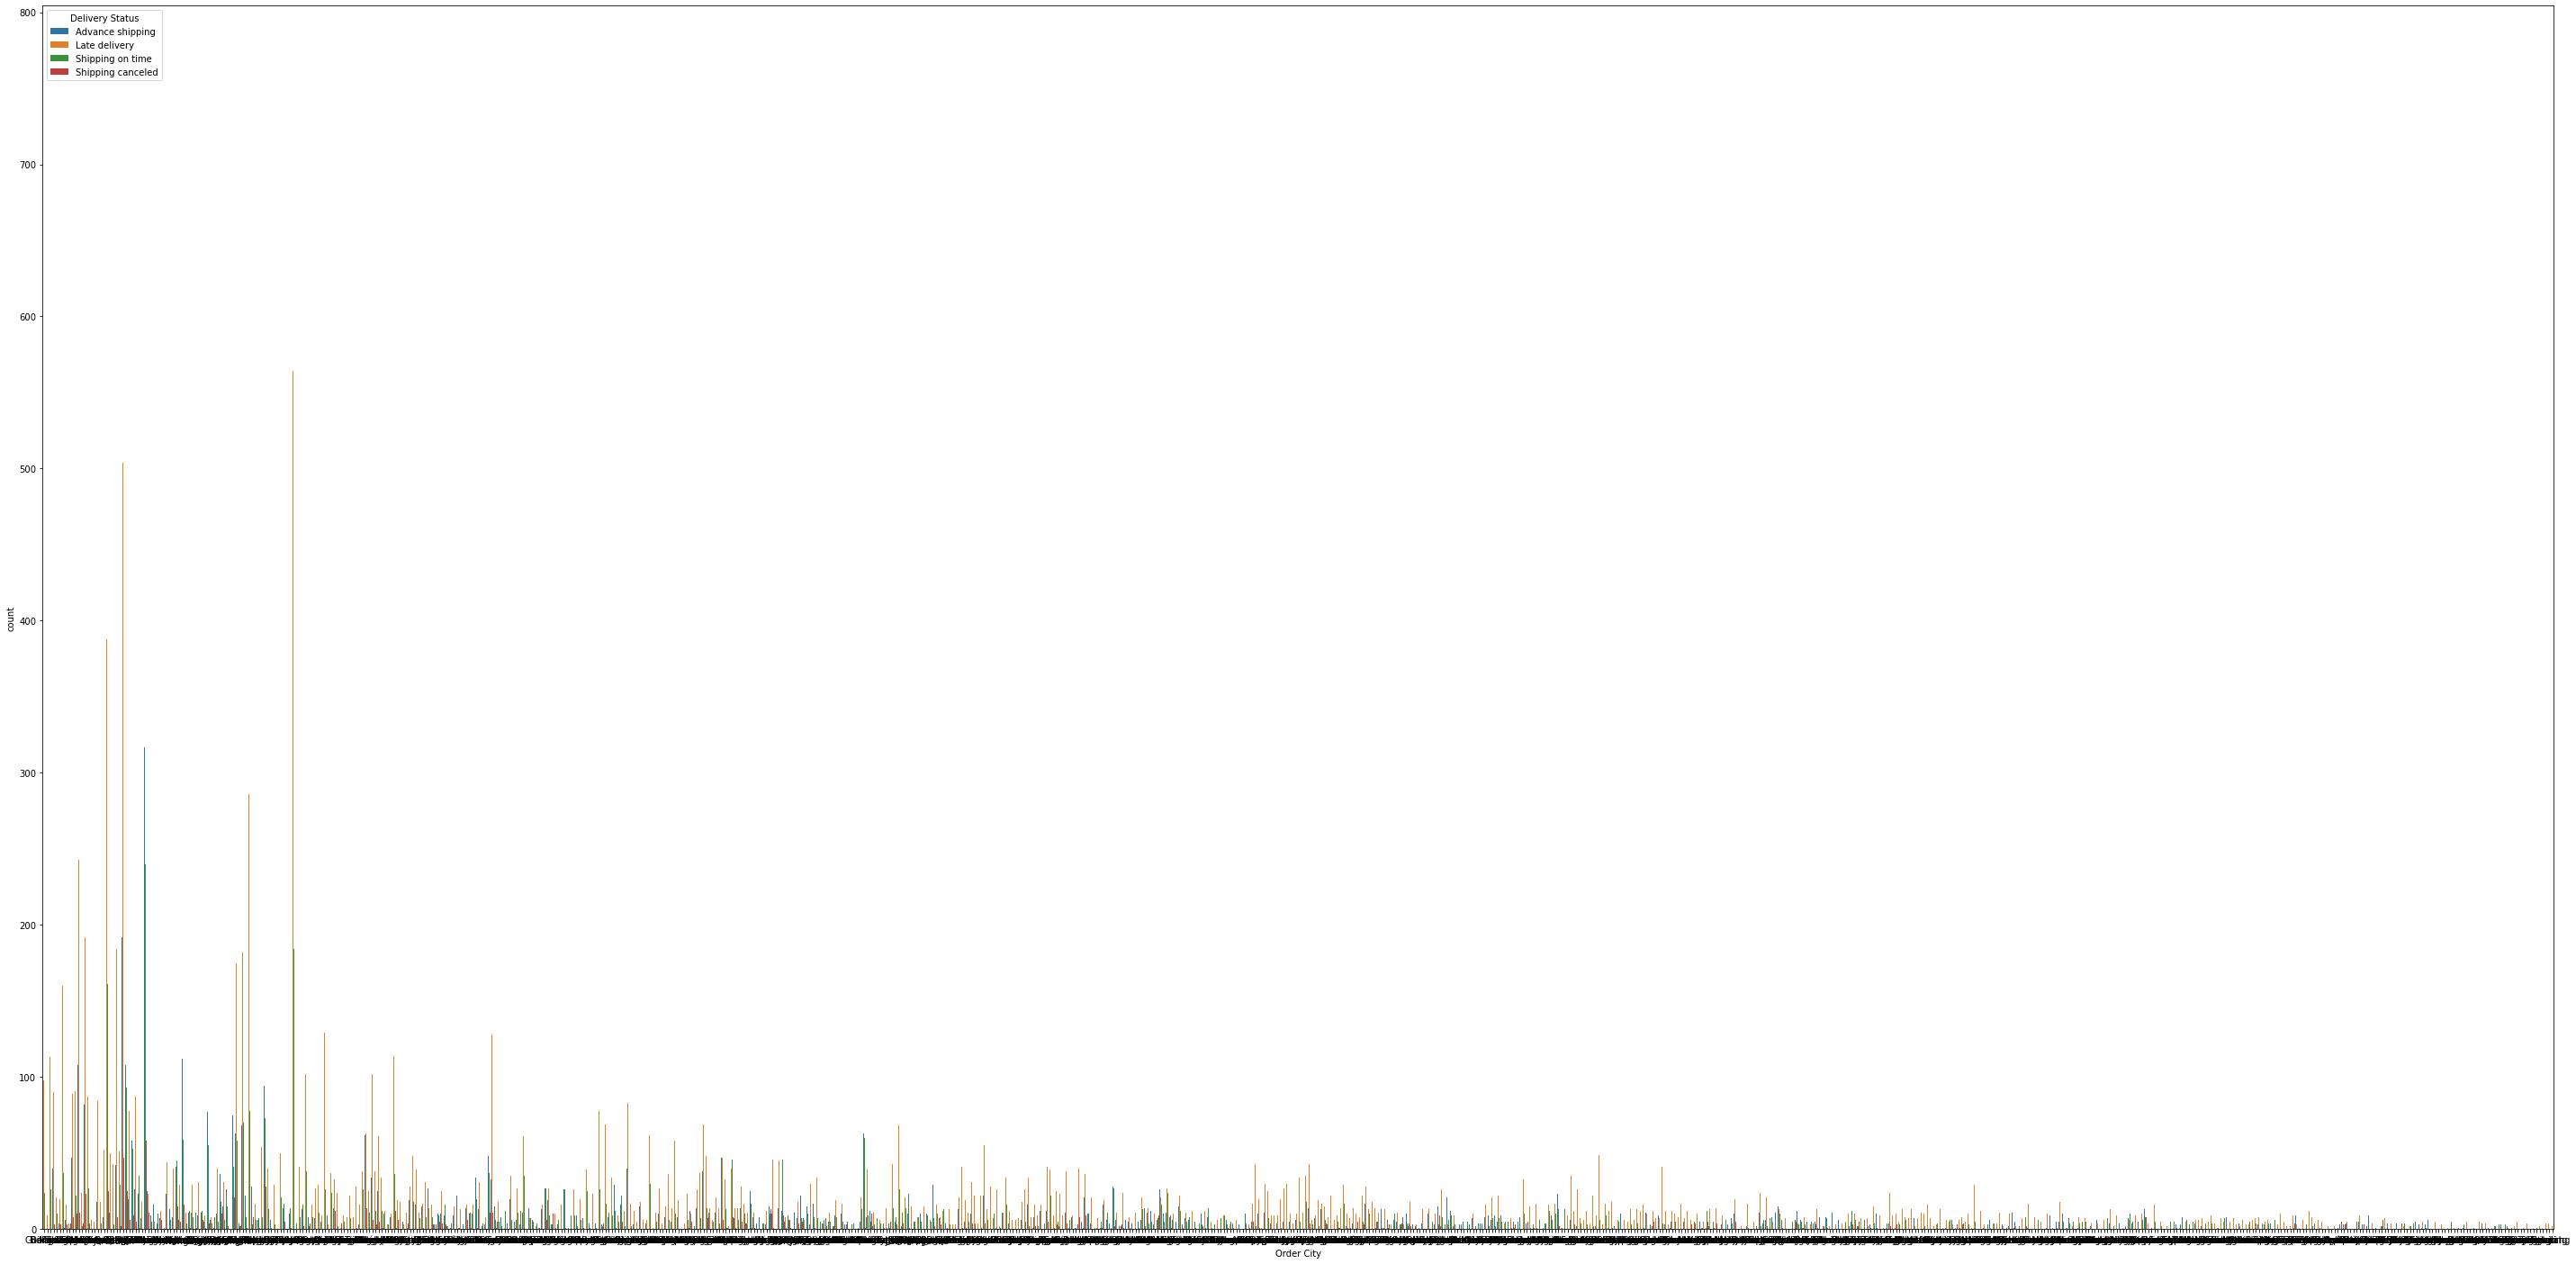

In [51]:
plt.figure(figsize=(50,25))
sns.countplot(df_cat.iloc[:,8],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Order Country', ylabel='count'>

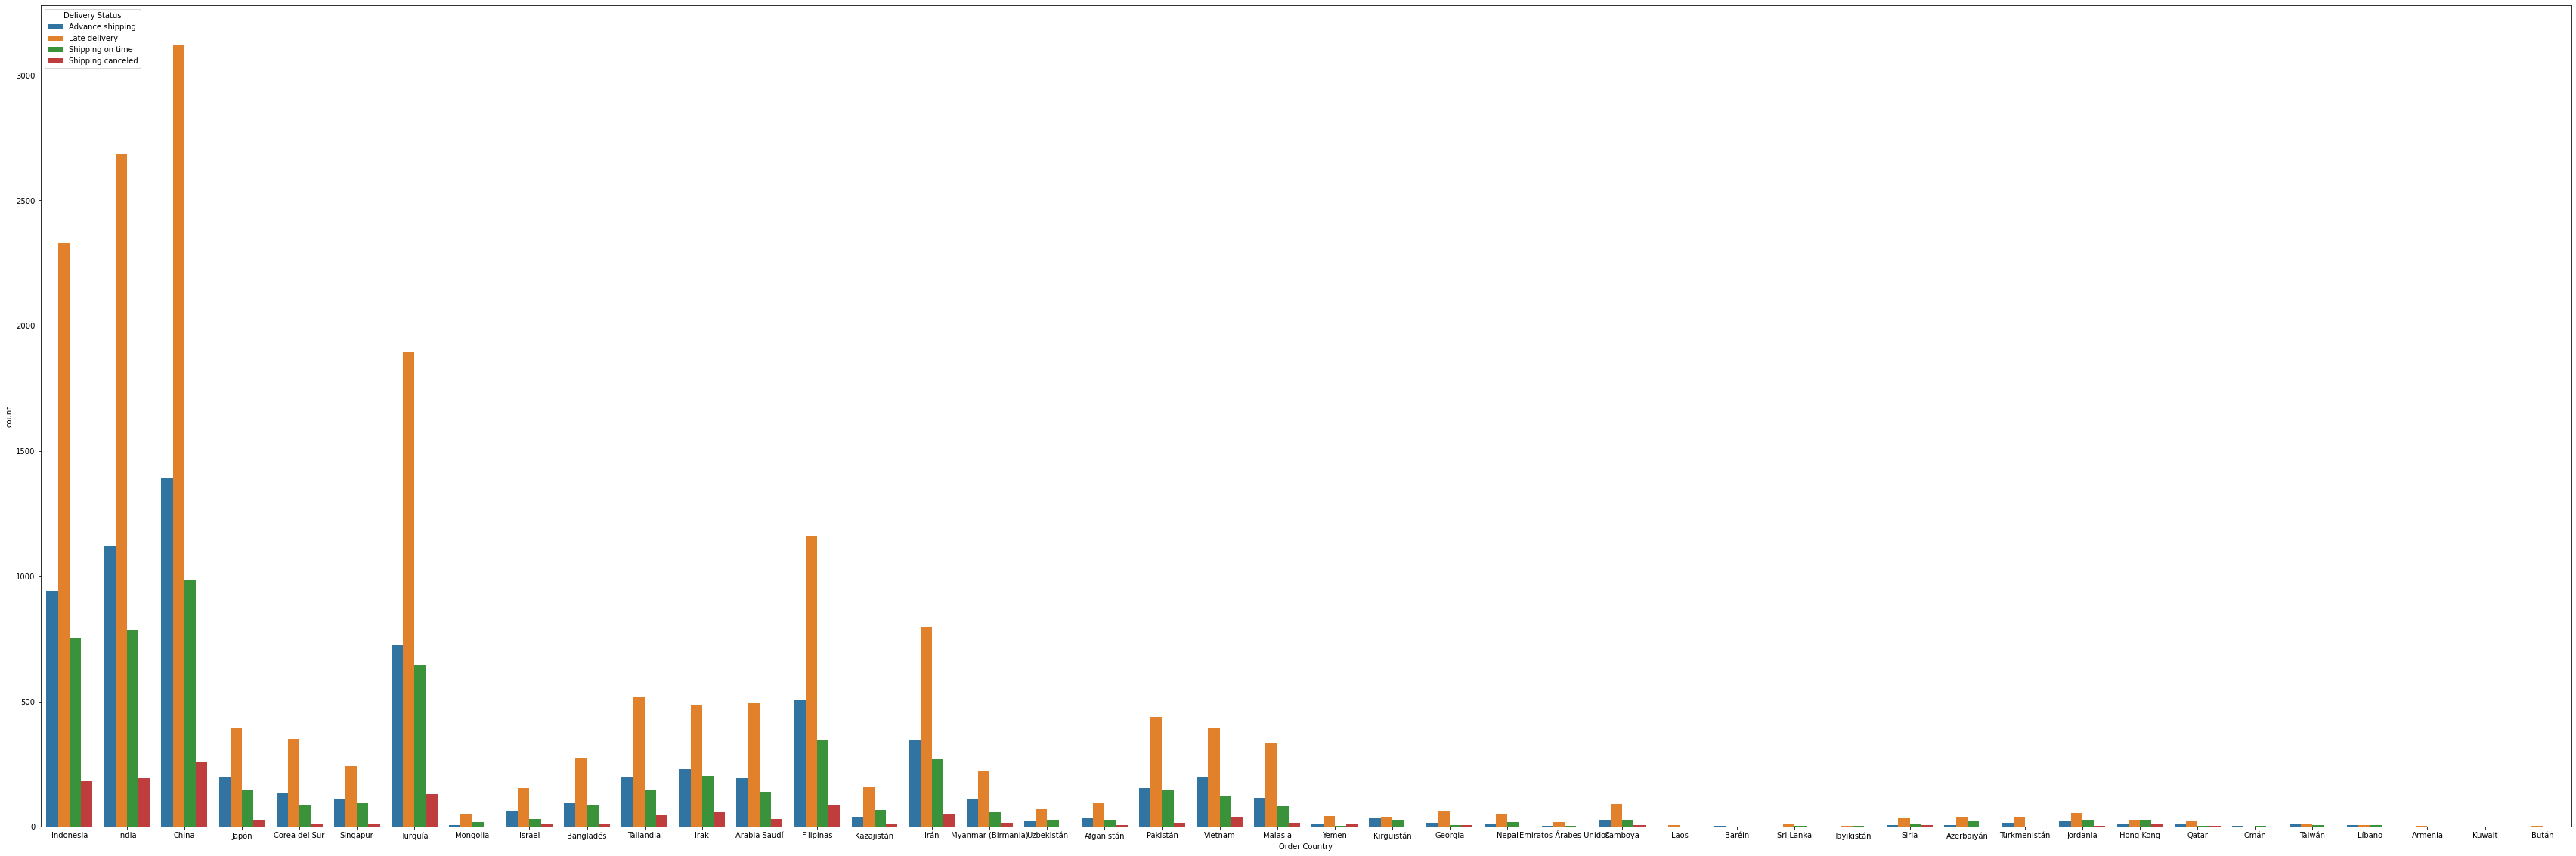

In [52]:
plt.figure(figsize=(60,20))
sns.countplot(df_cat.iloc[:,9],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Order Region', ylabel='count'>

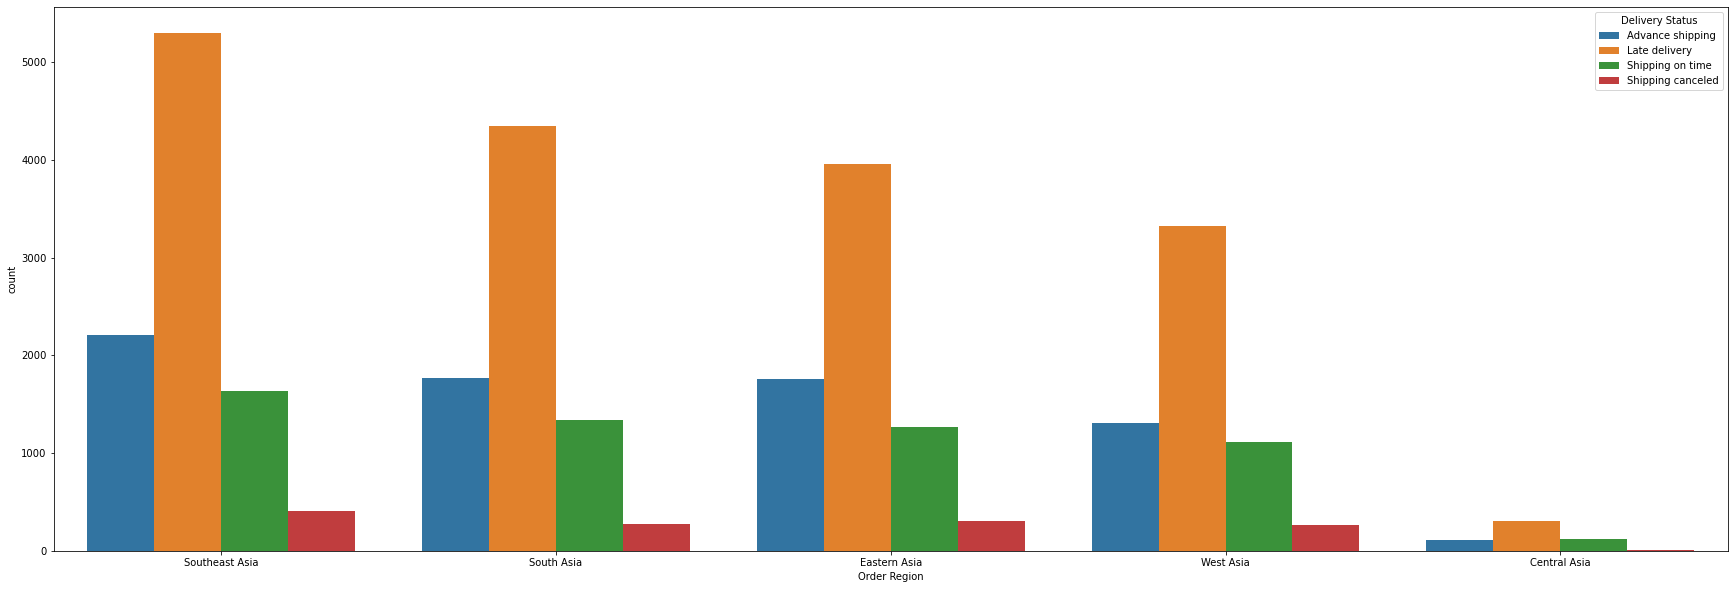

In [53]:
plt.figure(figsize=(30,10))
sns.countplot(df_cat.iloc[:,11],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Order State', ylabel='count'>

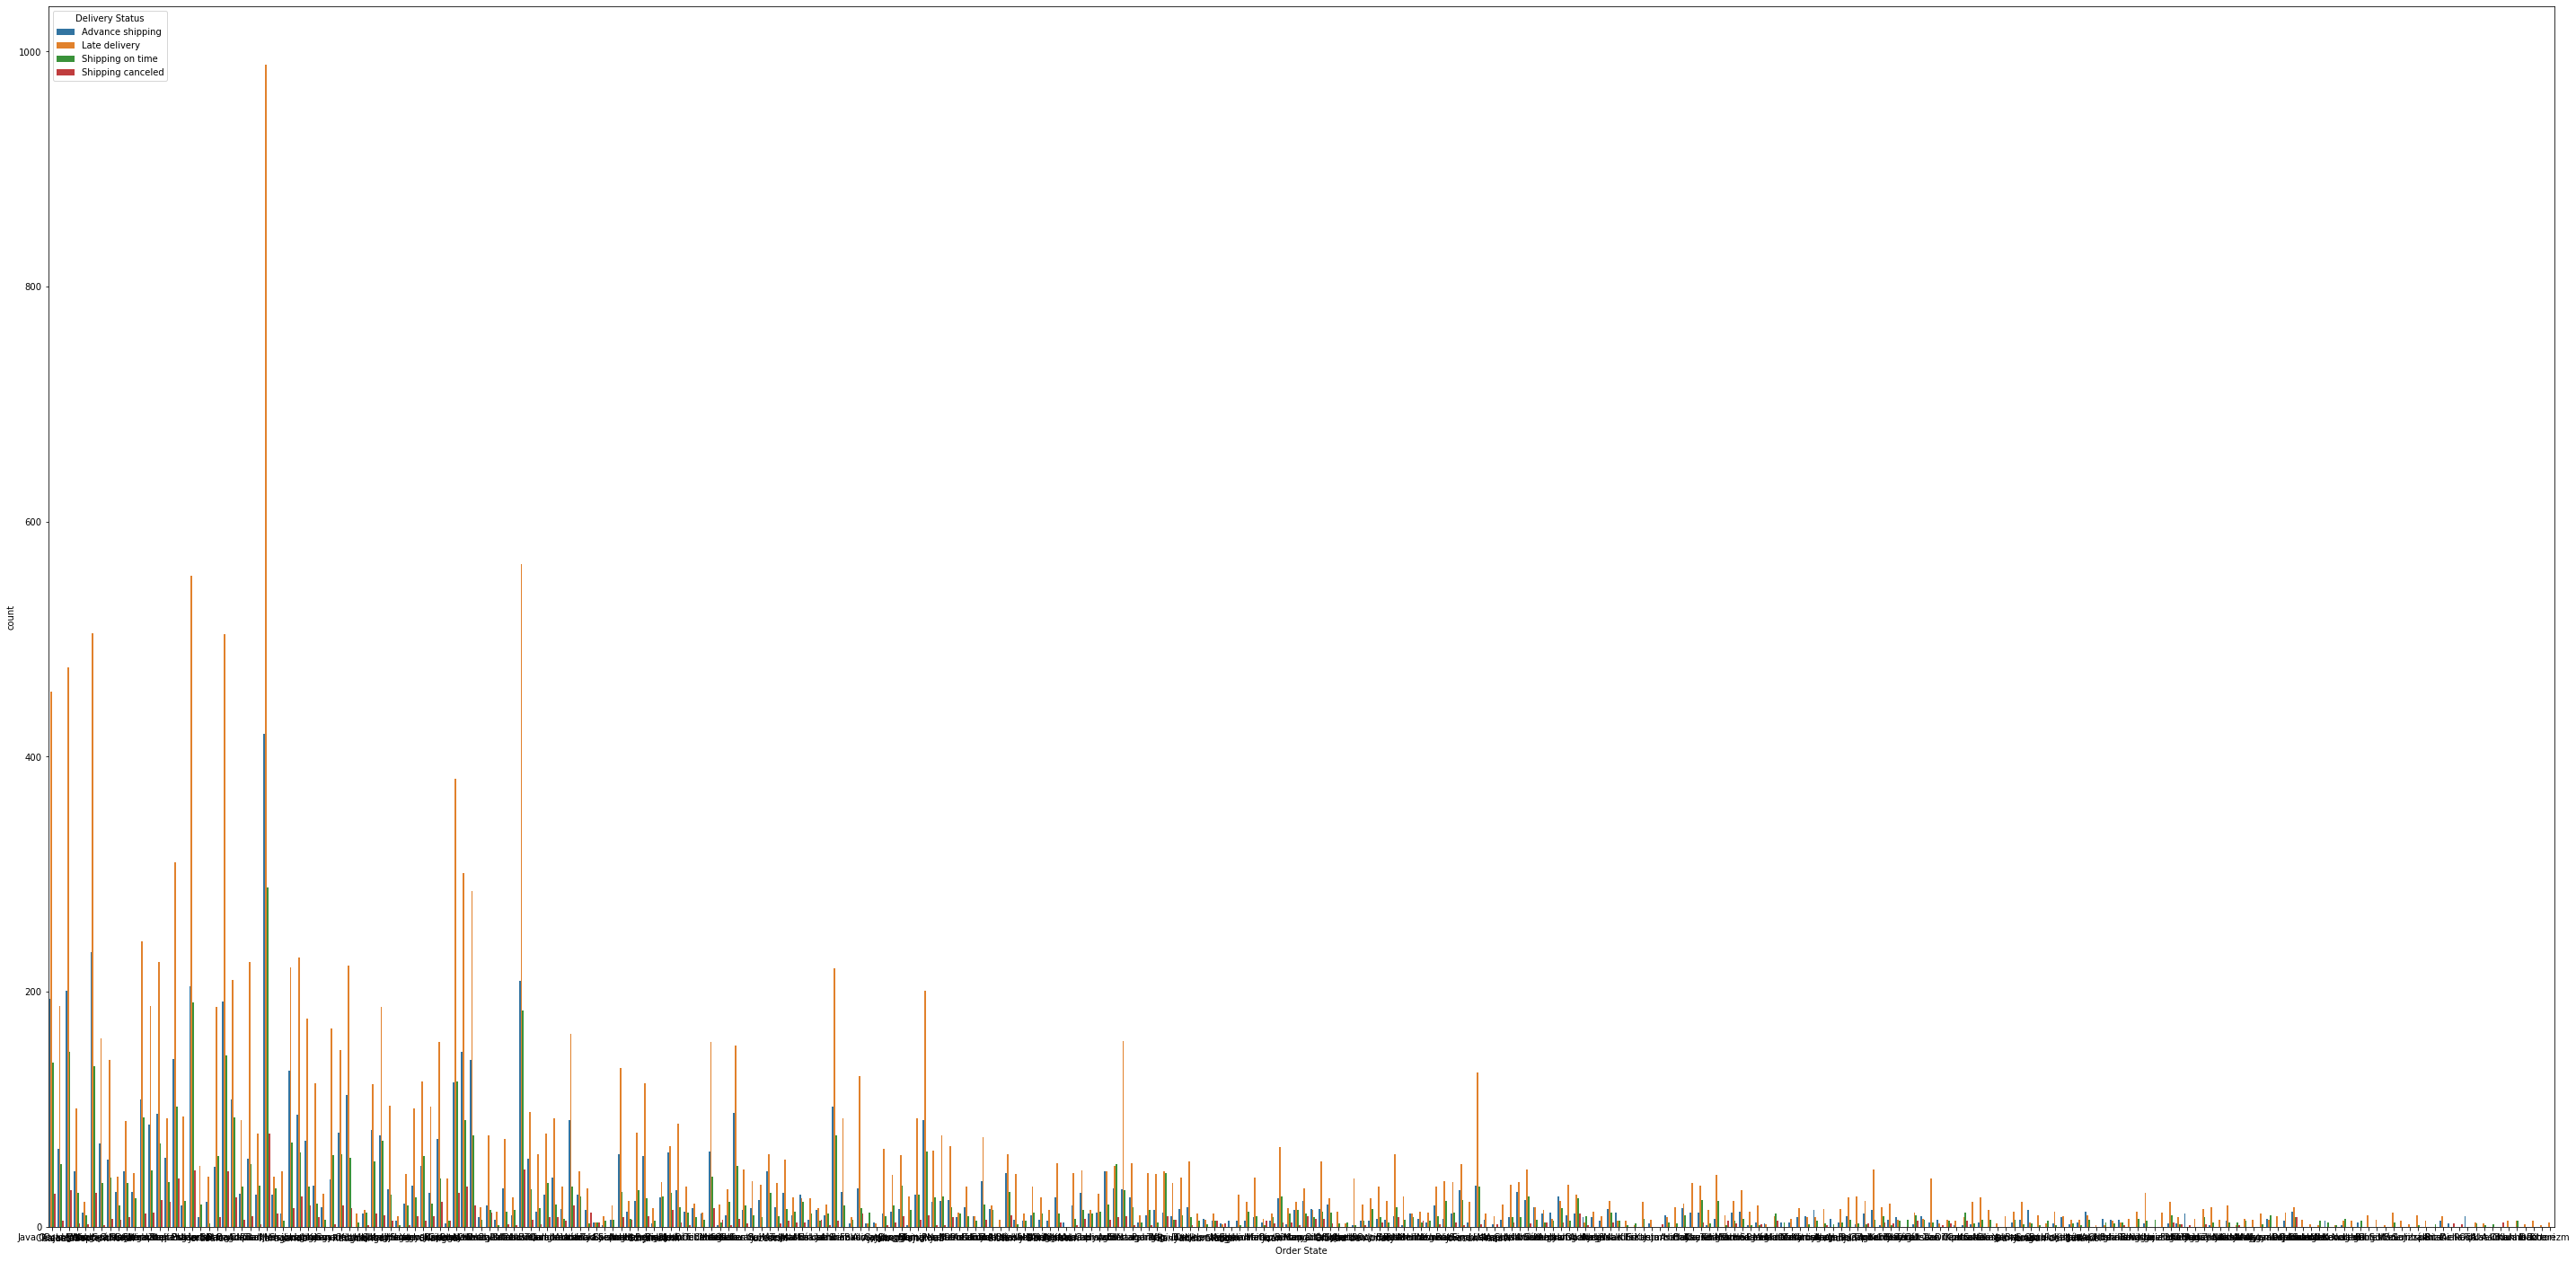

In [54]:
plt.figure(figsize=(50,25))
sns.countplot(df_cat.iloc[:,12],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Order Status', ylabel='count'>

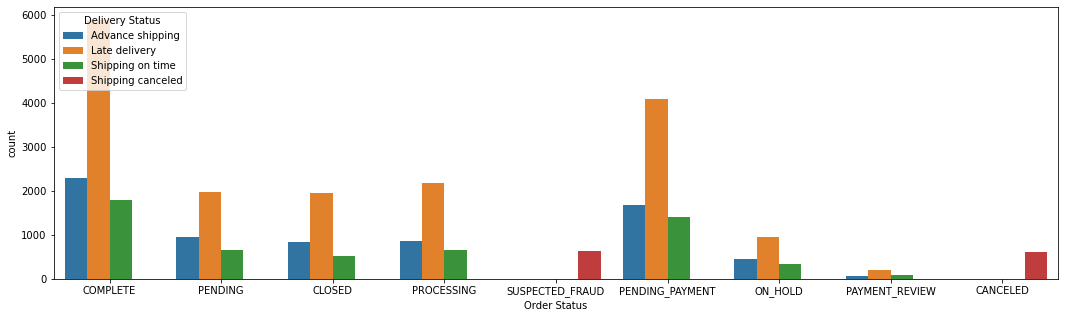

In [55]:
plt.figure(figsize=(18,5))
sns.countplot(df_cat.iloc[:,13],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Product Name', ylabel='count'>

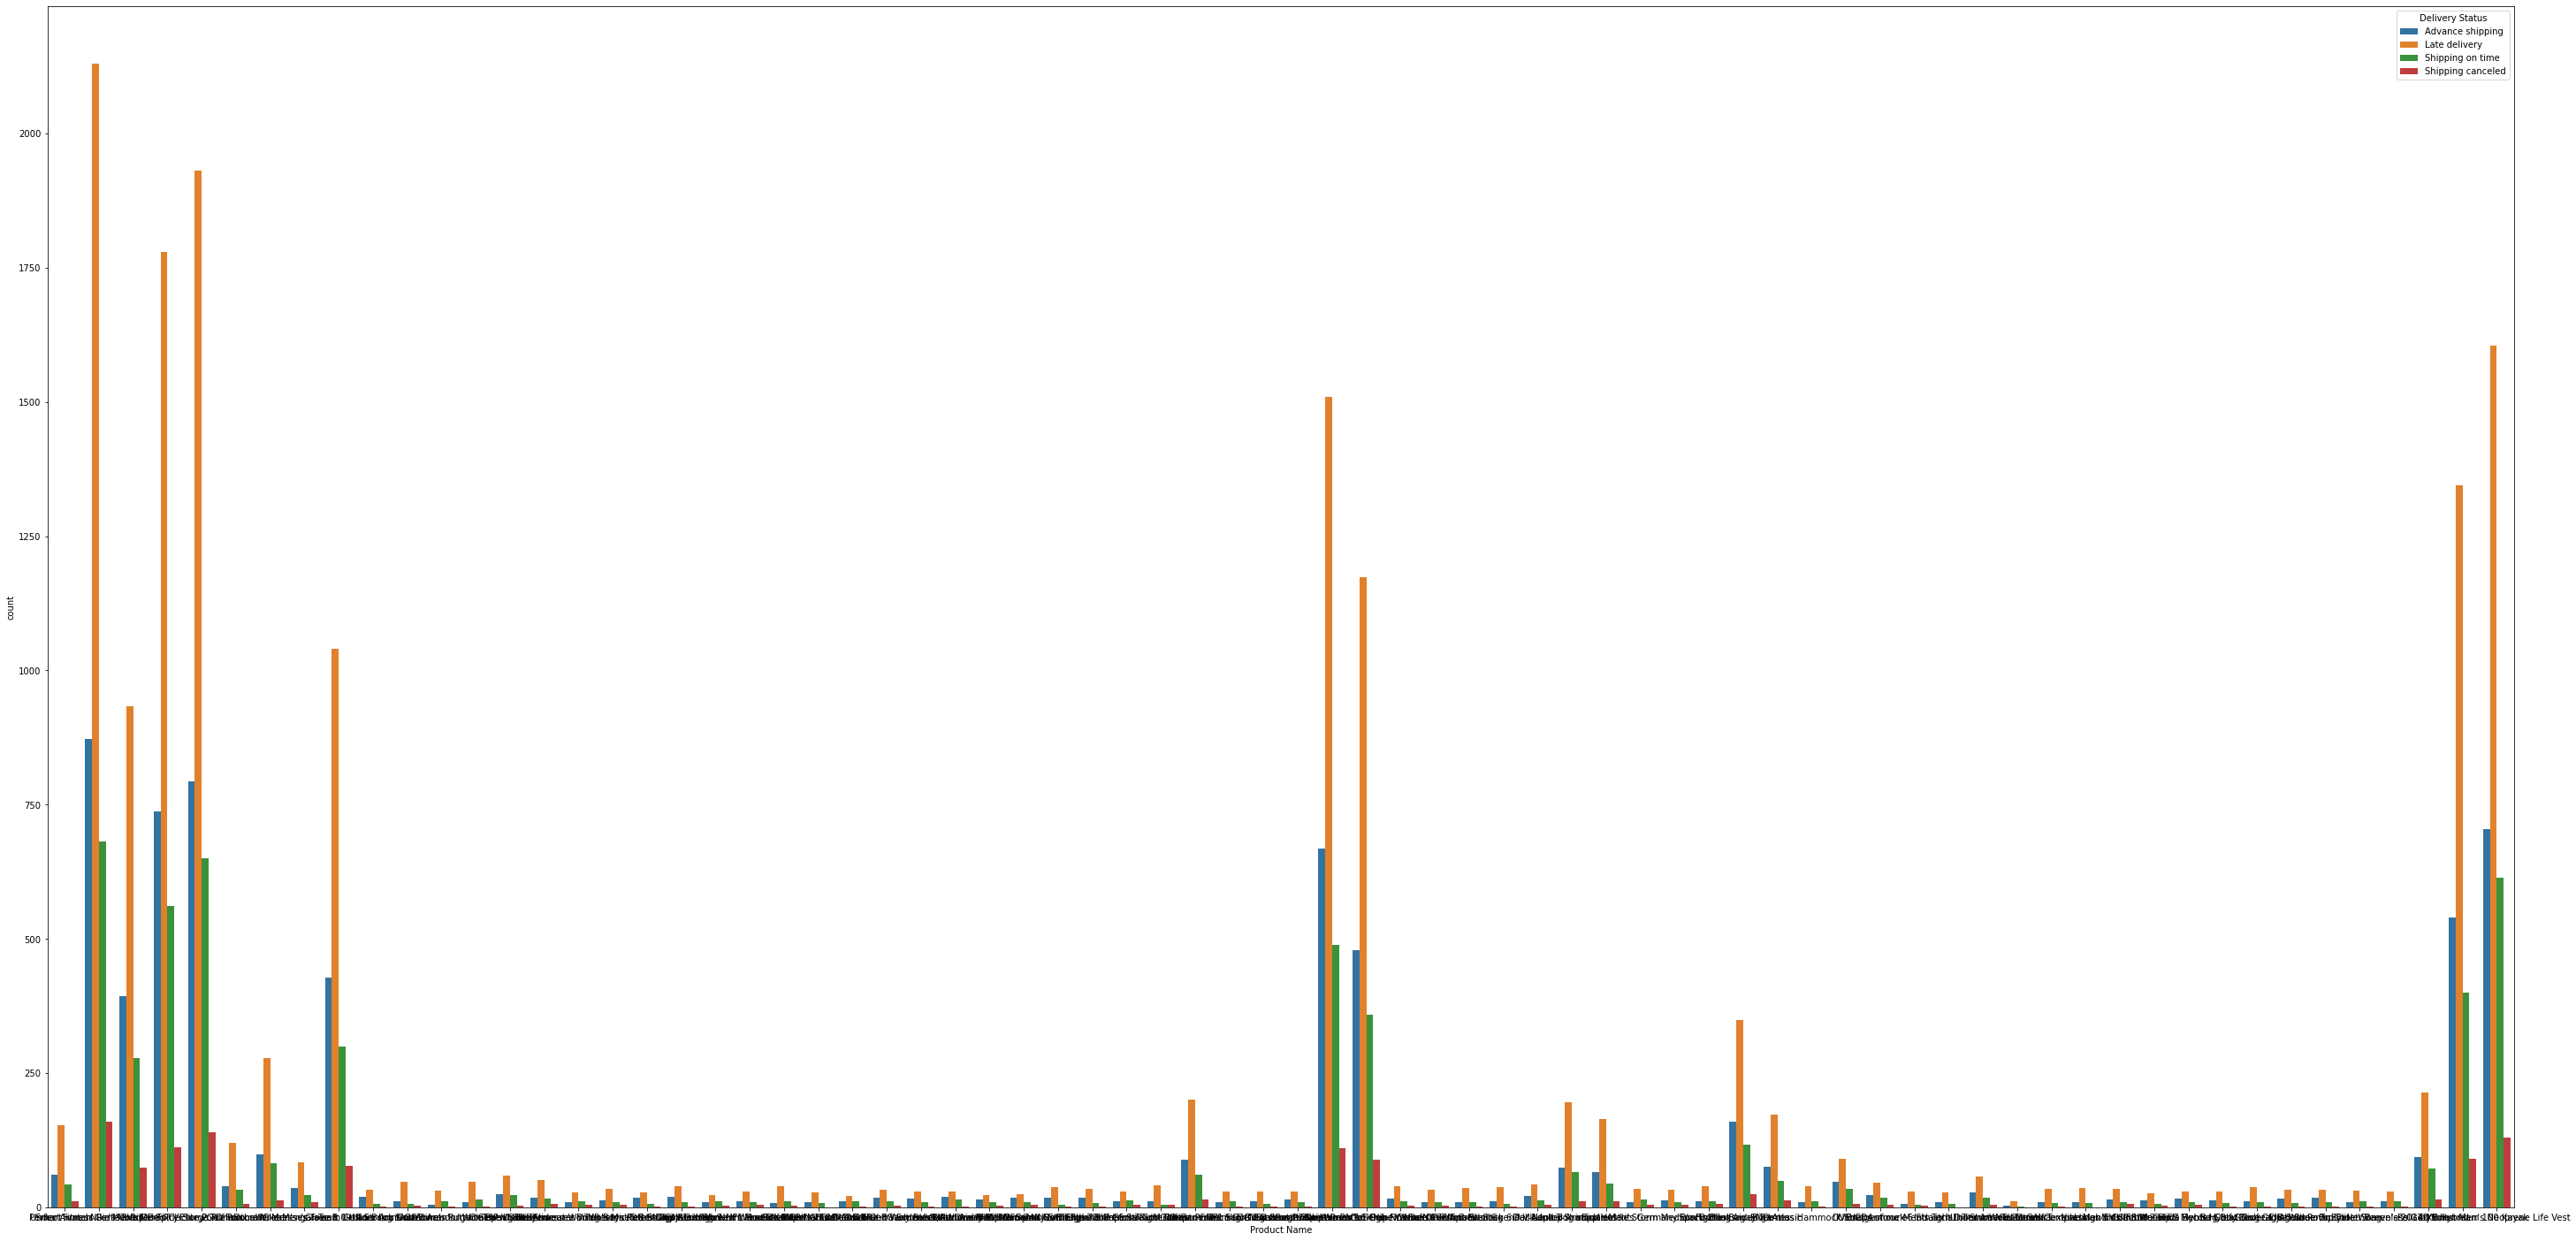

In [56]:
plt.figure(figsize=(50,25))
sns.countplot(df_cat.iloc[:,14],hue=df['Delivery Status'])

<AxesSubplot:xlabel='Shipping Mode', ylabel='count'>

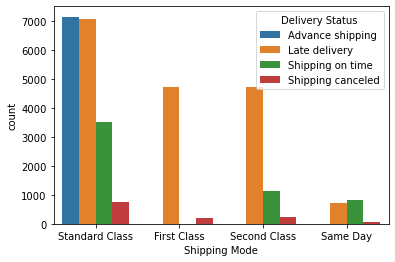

In [57]:
sns.countplot(df_cat.iloc[:,16],hue=df['Delivery Status'])

In [58]:
df_cat['Shipping Mode'].value_counts()/len(df_cat)*100

Standard Class    59.417588
Second Class      19.645153
First Class       15.862047
Same Day           5.075212
Name: Shipping Mode, dtype: float64

In [59]:
df_cat['Shipping Mode']=np.where(df_cat['Shipping Mode']=='Same Day',np.random.choice(['Standard Class','First Class','Second Class'],p=[0.60,0.20,0.20], size=len(df_cat)),df_cat['Shipping Mode'])

In [60]:
df_cat['Shipping Mode'].value_counts()

Standard Class    19413
Second Class       6447
First Class        5252
Name: Shipping Mode, dtype: int64

<AxesSubplot:xlabel='Shipping Mode', ylabel='count'>

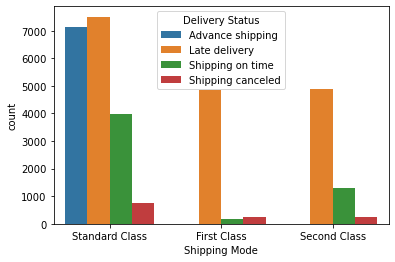

In [61]:
sns.countplot(df_cat.iloc[:,16],hue=df['Delivery Status'])

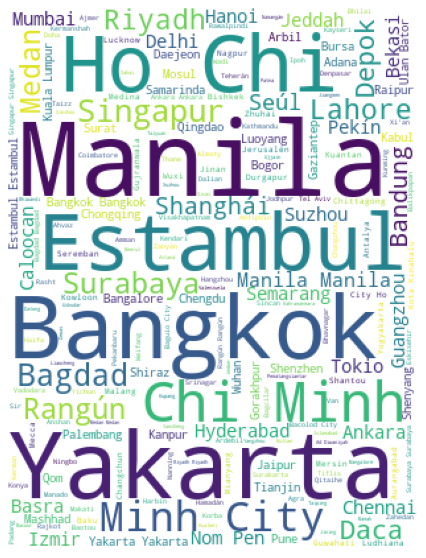

In [62]:
from wordcloud import WordCloud

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color='white',width=312,height=412).generate(' '.join(df['Order City']))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

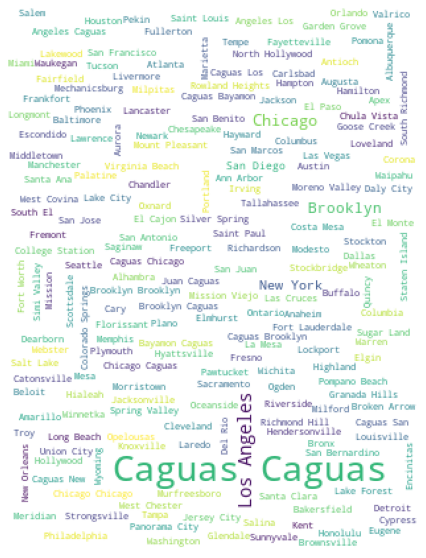

In [63]:
from wordcloud import WordCloud

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color='white',width=312,height=412).generate(' '.join(df['Customer City']))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

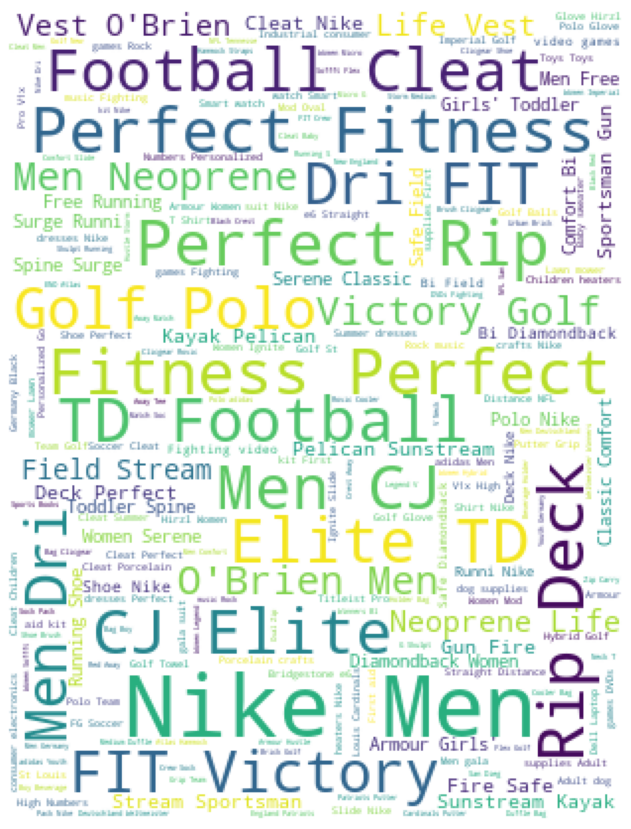

In [64]:
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
wordcloud=WordCloud(background_color='white',width=312,height=412).generate(' '.join(df['Product Name']))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

In [65]:
df['Delivery Status']=np.where(df['Delivery Status']=='Late delivery',0,df['Delivery Status'])
df['Delivery Status']=np.where(df['Delivery Status']=='Advance shipping',1,df['Delivery Status'])
df['Delivery Status']=np.where(df['Delivery Status']=='Shipping on time',2,df['Delivery Status'])
df['Delivery Status']=np.where(df['Delivery Status']=='Shipping canceled',3,df['Delivery Status'])

## Statistical analysis whether the numerical variable  is Significant or not

In [66]:
#h0:Days for shipping is not significant variable in the analysis of our target variable Delivery Status
#h1:Days for shipping is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Days for shipping (real)'],df['Delivery Status'])
p_val

0.0

In [67]:
p_val<0.05

True

In [68]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Days for shipping is significant variable

In [69]:
#h0:Days for shipment (scheduled) is not significant variable in the analysis of our target variable Delivery Status
#h1:Days for shipment (scheduled) is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Days for shipment (scheduled)'],df['Delivery Status'])
p_val

0.0

In [70]:
p_val<0.05

True

In [71]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Days for shipment (scheduled) is significant variable

In [72]:
#h0:Benefit per order is not significant variable in the analysis of our target variable Delivery Status
#h1:Benefit per order is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Benefit per order'],df['Delivery Status'])
p_val


7.272184450883952e-260

In [73]:
p_val<0.05

True

In [74]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Benefit per order is significant variable

In [75]:
#h0:Sales per customer is not significant variable in the analysis of our target variable Delivery Status
#h1:Sales per customer is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Sales per customer'],df['Delivery Status'])
p_val



0.0

In [76]:
p_val<0.05

True

In [77]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Sales per customer is significant variable

In [78]:
#h0:Order Item Discount is not significant variable in the analysis of our target variable Delivery Status
#h1:Order Item Discount is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Order Item Discount'],df['Delivery Status'])
p_val

0.0

In [79]:
p_val<0.05

True

In [80]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Order Item Discount is significant variable


In [81]:
#h0:Order Item Discount Rate is not significant variable in the analysis of our target variable Delivery Status
#h1:Order Item Discount Rate is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Order Item Discount Rate'],df['Delivery Status'])
p_val


0.0

In [82]:
p_val<0.05

True

In [83]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Order Item Discount Rate is significant variable

In [84]:
#h0:Order Item Product Price is not significant variable in the analysis of our target variable Delivery Status
#h1:Order Item Product Price is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Order Item Product Price'],df['Delivery Status'])
p_val


0.0

In [85]:
p_val<0.05

True

In [86]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Order Item Product Price is significant variable

In [87]:
#h0:Order Item Profit Ratio is not significant variable in the analysis of our target variable Delivery Status
#h1:Order Item Profit Ratio is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Order Item Profit Ratio'],df['Delivery Status'])
p_val

0.0

In [88]:
p_val<0.05

True

In [89]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Order Item Profit Ratio is significant variable

In [90]:
#h0:Order Item Quantity is not significant variable in the analysis of our target variable Delivery Status
#h1:Order Item Quantity is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Order Item Quantity'],df['Delivery Status'])
p_val

0.0

In [91]:
p_val<0.05

True

In [92]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Order Item Quantity is significant variable

In [93]:
#h0:Sales is not significant variable in the analysis of our target variable Delivery Status
#h1:Sales is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Sales'],df['Delivery Status'])
p_val

0.0

In [94]:
p_val<0.05

True

In [95]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Sales is significant variable


In [96]:
#h0:Order Item Totalis not significant variable in the analysis of our target variable Delivery Status
#h1:Order Item Total is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Order Item Total'],df['Delivery Status'])
p_val

0.0

In [97]:
p_val<0.05

True

In [98]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Order Item Total is significant variable

In [99]:
#h0:Order Profit Per Order is not significant variable in the analysis of our target variable Delivery Status
#h1:Order Profit Per Order is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Order Profit Per Order'],df['Delivery Status'])
p_val

7.272184450883952e-260

In [100]:
p_val<0.05

True

In [101]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Order Profit Per Order is significant variable

In [102]:
#h0:Product Price is not significant variable in the analysis of our target variable Delivery Status
#h1:Product Price is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Product Price'],df['Delivery Status'])
p_val

0.0

In [103]:
p_val<0.05

True

In [104]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Product Price is significant variable

In [105]:
#h0:Late_delivery_riskis not significant variable in the analysis of our target variable Delivery Status
#h1:Late_delivery_risk is significant variable
#I assume data is normal 
#Parametric Test
test,p_val=stats.f_oneway(df['Late_delivery_risk'],df['Delivery Status'])
p_val

8.420944950428148e-145

In [106]:
p_val<0.05

True

In [107]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Late_delivery_risk is significant variable

The variable which we are selected , all are significant variables in numerical features.

 ## Statistical analysis whether the categorical variable  is Significant or not

In [108]:
#h0:Type is not significant variable in the analysis of our target variable Delivery Status
#h1:Type is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Type"],df["Delivery Status"]))
p_val

0.0

In [109]:
p_val<0.05

True

In [110]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Type is significant variable

In [111]:
#h0:Category Name is not significant variable in the analysis of our target variable Delivery Status
#h1:Category Name is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Category Name"],df["Delivery Status"]))
p_val

0.9111079815098336

In [112]:
p_val<0.05

False

In [113]:
#p_value is more than significant value 0.5
#we not reject null hypothesis
#Category Name is not significant variable

In [114]:
#h0:Customer City is not significant variable in the analysis of our target variable Delivery Status
#h1:Customer City is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Customer City"],df["Delivery Status"]))
p_val

0.0

In [115]:
p_val<0.05

True

In [116]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Customer City is significant variable

In [117]:
#h0:Customer City is not significant variable in the analysis of our target variable Delivery Status
#h1:Customer City is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Customer City"],df["Delivery Status"]))
p_val

0.0

In [118]:
p_val<0.05

True

In [119]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Customer City is significant variable

In [120]:
#h0:Customer Country is not significant variable in the analysis of our target variable Delivery Status
#h1:Customer Countryis significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Customer Country"],df["Delivery Status"]))
p_val


0.2187613274115961

In [121]:
p_val<0.05

False

In [122]:
#p_value is more than significant value 0.5
#we not reject null hypothesis
#Customer Country is not significant variable

In [123]:
#h0:Customer Segment is not significant variable in the analysis of our target variable Delivery Status
#h1:Customer Segment is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Customer Segment"],df["Delivery Status"]))
p_val


0.014421045935113005

In [124]:
p_val<0.05

True

In [125]:
#p_value is less than significant value 0.5
#we reject null hypothesis
# Customer Segment is significant variable


In [126]:
#h0:Customer State is not significant variable in the analysis of our target variable Delivery Status
#h1:Customer State is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Customer State"],df["Delivery Status"]))
p_val

6.25182291416503e-23

In [127]:
p_val<0.05

True

In [128]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Customer State is significant variable

In [129]:
#h0:Department Name is not significant variable in the analysis of our target variable Delivery Status
#h1:Department Name is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Department Name"],df["Delivery Status"]))
p_val



0.5744864120278483

In [130]:
p_val<0.05

False

In [131]:
#p_value is more than significant value 0.5
#we not reject null hypothesis
#Department Name is not significant variable

In [132]:
#h0:Order City is not significant variable in the analysis of our target variable Delivery Status
#h1:Order Cityis significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Order City"],df["Delivery Status"]))
p_val

0.0

In [133]:
p_val<0.05

True

In [134]:
#p_value is less than significant value 0.5
#we  reject null hypothesis
#Order City is  significant variable

In [135]:
#h0:Order Country is not significant variable in the analysis of our target variable Delivery Status
#h1:Order Country is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Order Country"],df["Delivery Status"]))
p_val

3.3189330242884235e-30

In [136]:
p_val<0.05

True

In [137]:
#p_value is less than significant value 0.5
#we  reject null hypothesis
#Order Country is  significant variable

In [138]:
#h0:Order Region is not significant variable in the analysis of our target variable Delivery Status
#h1:Order Region is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Order Region"],df["Delivery Status"]))
p_val

0.00019328155511915207

In [139]:
p_val<0.05

True

In [140]:
#p_value is more than significant value 0.5
#we not reject null hypothesis
#Order Region is not significant variable

In [141]:
#h0:Order State  is not significant variable in the analysis of our target variable Delivery Status
#h1:Order State is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Order State"],df["Delivery Status"]))
p_val

4.0744929637699255e-217

In [142]:
p_val<0.05

True

In [143]:
#p_value is less than significant value 0.5
#we reject null hypothesis
#Order State is  significant variable

In [144]:
#h0:Order Status  is not significant variable in the analysis of our target variable Delivery Status
#h1:Order Status is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Order Status"],df["Delivery Status"]))
p_val

0.0

In [145]:
p_val<0.05

True

In [146]:
#p_value is  than significant value 0.5
#we reject null hypothesis
#Order Status is  significant variable

In [147]:
#h0:Product Name  is not significant variable in the analysis of our target variable Delivery Status
#h1:Product Name is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Product Name"],df["Delivery Status"]))
p_val

0.9473218900984649

In [148]:
p_val<0.05

False

In [149]:
#p_value is more than significant value 0.5
#we not reject null hypothesis
#Product Name is not significant variable

In [150]:
#h0:Shipping Mode  is not significant variable in the analysis of our target variable Delivery Status
#h1:Shipping Mode is significant variable
#I assume data is normal 
test,p_val,dof,x=stats.chi2_contingency(pd.crosstab(df_cat["Shipping Mode"],df["Delivery Status"]))
p_val

0.0

In [151]:
p_val<0.05

True

In [152]:
#p_value is  than significant value 0.5
#we reject null hypothesis
#Shipping Mode is  significant variable

## Scaling

Logistic regressions and tree-based algorithms such as decision trees, random forests and gradient boosting are not sensitive to the magnitude of variables. So standardization is not needed before fitting these kinds of models
If we scale the numerical varaibles for logistic regression.obviously we will end up with over fit condition.


## Multicollinearity

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
vif_list=[]
for i in range(df_num.shape[1]):
    vif_list.append(variance_inflation_factor(df_num.values,i)) #this creates VIF and now lets put output in the Dataframe
pd.DataFrame({'Features':df_num.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)   

,Features,VIF
2,Benefit per order,inf
3,Sales per customer,inf
7,Order Item Product Price,inf
11,Order Item Total,inf
12,Order Profit Per Order,inf
13,Product Price,inf
10,Sales,3.655190e+04
5,Order Item Discount,5.546238e+02
0,Days for shipping (real),1.704174e+01
9,Order Item Quantity,1.513032e+01


## Base Model Building

In [155]:
df_cat_final=df_cat.drop(['Category Name','Department Name','Order Region','Product Name',
                          'order date (DateOrders)','shipping date (DateOrders)','Customer City',
                          'Order City','Delivery Status'],axis=1)

In [156]:

df_cat_enc=pd.get_dummies(df_cat_final,drop_first=True)


In [157]:
df_cat_final

,Type,Customer Country,Customer Segment,Customer State,Order Country,Order State,Order Status,Shipping Mode
0,DEBIT,Puerto Rico,Consumer,PR,Indonesia,Java Occidental,COMPLETE,Standard Class
1,TRANSFER,Puerto Rico,Consumer,PR,India,Rajastán,PENDING,Standard Class
2,CASH,EE. UU.,Consumer,CA,India,Rajastán,CLOSED,Standard Class
3,DEBIT,Puerto Rico,Home Office,PR,China,Guangdong,COMPLETE,First Class
4,TRANSFER,EE. UU.,Corporate,FL,China,Guangdong,PROCESSING,First Class
...,...,...,...,...,...,...,...,...
31107,DEBIT,Puerto Rico,Home Office,PR,China,Sichuan,COMPLETE,Standard Class
31108,PAYMENT,EE. UU.,Home Office,OH,China,Shanghái,PENDING_PAYMENT,Standard Class
31109,CASH,EE. UU.,Home Office,NY,China,Shanghái,CLOSED,Standard Class
31110,DEBIT,EE. UU.,Corporate,CA,Japón,Osaka,COMPLETE,Second Class


In [158]:
df_final=pd.concat([df_num,df_cat_enc],axis=1)

In [159]:
df_final

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,...,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,13.110000,0.04,327.750000,0.29,1.0,...,0,1,0,0,0,0,0,0,0,1
1,5,4,-249.089996,311.359985,1,16.389999,0.05,327.750000,-0.80,1.0,...,0,0,0,0,1,0,0,0,0,1
2,4,4,-247.779999,309.720001,0,18.030001,0.06,327.750000,-0.80,1.0,...,1,0,0,0,0,0,0,0,0,1
3,2,1,95.180000,288.420013,1,39.330002,0.12,327.750000,0.33,1.0,...,0,1,0,0,0,0,0,0,0,0
4,2,1,68.430000,285.140015,1,42.610001,0.13,327.750000,0.24,1.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31107,6,4,86.400002,319.980011,1,80.000000,0.20,399.980011,0.27,1.0,...,0,1,0,0,0,0,0,0,0,1
31108,3,4,119.989998,299.989990,0,100.000000,0.25,399.980011,0.40,1.0,...,0,0,0,0,0,1,0,0,0,1
31109,4,4,40.000000,399.980011,0,0.000000,0.00,399.980011,0.10,1.0,...,1,0,0,0,0,0,0,0,0,1
31110,3,2,-613.770019,395.980011,1,4.000000,0.01,399.980011,-1.55,1.0,...,0,1,0,0,0,0,0,0,1,0


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [161]:
df['Delivery Status']=df['Delivery Status'].astype(int)

In [162]:
x=df_final
y=df['Delivery Status']

In [163]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31112 entries, 0 to 31111
Columns: 420 entries, Days for shipping (real) to Shipping Mode_Standard Class
dtypes: float64(11), int64(3), uint8(406)
memory usage: 15.4 MB


In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40,stratify=y)

## Base Model

We are not going to use Logistic Regression as our Base model,as it is having multi class as target variable and it will not have good accuracy in prediction.If it is having two classes ,it can easily predict using Sigmoid curve

In [165]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Decision Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [167]:
base_model=dt.fit(x_train,y_train)

In [168]:

ypred_dt=base_model.predict(x_test)

In [169]:
ypred_dt_train=base_model.predict(x_train)

In [170]:
print(classification_report(y_train,ypred_dt_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13784
           1       1.00      1.00      1.00      5719
           2       1.00      1.00      1.00      4378
           3       1.00      1.00      1.00      1008

    accuracy                           1.00     24889
   macro avg       1.00      1.00      1.00     24889
weighted avg       1.00      1.00      1.00     24889



In [171]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       1.00      1.00      1.00      1430
           2       1.00      1.00      1.00      1095
           3       1.00      1.00      1.00       252

    accuracy                           1.00      6223
   macro avg       1.00      1.00      1.00      6223
weighted avg       1.00      1.00      1.00      6223



We are using Decision Tree for predicting multi class model 
As we know without parameters it will be overfit and learn all the patterns.So,we have to use the Grid Search CV for the best parameter suits this model

## Grid Search CV(Decision Tree)

In [172]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [173]:
params =             [{'criterion': ['entropy', 'gini'],
                     'max_depth': [6,7,10,12],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2,4,6],
                     'min_samples_leaf': [2,4,6],
                     'max_leaf_nodes': [12,16,18]}]
                     
                     
dt=DecisionTreeClassifier(random_state=10)

dt_cv = GridSearchCV(dt,params,cv=3,scoring='accuracy')
dt_cv.fit(x_train,y_train)

dt_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'max_leaf_nodes': 18,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [174]:
dt_grid_model = DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth =12,
                                  max_features = 'sqrt',
                                  max_leaf_nodes =18,
                                  min_samples_leaf = 4,
                                  min_samples_split = 2,
                                  random_state =10)

In [175]:
dt_grid_model=dt_grid_model.fit(x_train,y_train)

In [176]:
y_pred_dt_grid=dt_grid_model.predict(x_test)

In [177]:
y_train_pred_dt_grid=dt_grid_model.predict(x_train)

In [178]:
print(classification_report(y_train,y_train_pred_dt_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13784
           1       0.67      1.00      0.80      5719
           2       1.00      0.44      0.61      4378
           3       0.67      0.42      0.51      1008

    accuracy                           0.88     24889
   macro avg       0.83      0.71      0.73     24889
weighted avg       0.91      0.88      0.87     24889



In [179]:
print(classification_report(y_test,y_pred_dt_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.67      1.00      0.80      1430
           2       0.99      0.44      0.61      1095
           3       0.70      0.46      0.55       252

    accuracy                           0.88      6223
   macro avg       0.84      0.72      0.74      6223
weighted avg       0.91      0.88      0.87      6223



## SMOTE MODEL

In [180]:
from imblearn.over_sampling import SMOTE

In [181]:
y_train.value_counts()

0    13784
1     5719
2     4378
3     1008
Name: Delivery Status, dtype: int64

In [182]:
smote=SMOTE(sampling_strategy={0:15000,1:6000,2:5000,3:1500})

In [183]:
xtrain_resampled,ytrain_resampled=smote.fit_resample(x_train,y_train)

In [184]:
dt_str_smote_model=dt_grid_model.fit(xtrain_resampled,ytrain_resampled)
ypred_dt_str_smote=dt_str_smote_model.predict(x_test)

In [185]:
print(classification_report(y_test,ypred_dt_str_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.72      0.89      0.79      1430
           2       1.00      0.43      0.60      1095
           3       0.46      0.97      0.62       252

    accuracy                           0.87      6223
   macro avg       0.79      0.82      0.75      6223
weighted avg       0.91      0.87      0.87      6223



In [186]:
ypred_train_dt_str_smote=dt_str_smote_model.predict(xtrain_resampled)

In [187]:
print(classification_report(ytrain_resampled,ypred_train_dt_str_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       0.70      0.89      0.78      6000
           2       1.00      0.44      0.61      5000
           3       0.55      0.99      0.71      1500

    accuracy                           0.87     27500
   macro avg       0.81      0.83      0.77     27500
weighted avg       0.91      0.87      0.87     27500



In [188]:
best_feature=pd.DataFrame()
best_feature['feature']=x_train.columns
best_feature['importance']=dt_str_smote_model.feature_importances_

In [189]:
best_feature.sort_values(['importance'],ascending=False).head(15)

,feature,importance
4,Late_delivery_risk,0.789957
16,Type_TRANSFER,0.103340
0,Days for shipping (real),0.089279
414,Order Status_PENDING,0.007636
418,Shipping Mode_Second Class,0.005417
94,Order Country_Pakistán,0.000897
410,Order Status_CLOSED,0.000771
39,Customer State_MD,0.000457
106,Order Country_Yemen,0.000400
168,Order State_Ciudad Ho Chi Minh,0.000353


In [190]:
X=df_final[['Late_delivery_risk','Days for shipping (real)','Type_TRANSFER','Order Status_PROCESSING',
           'Order Status_PENDING','Order Status_CLOSED','Order State_Jambi','Customer State_MD']]

In [191]:
Y=df[['Delivery Status']]

In [192]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=10,stratify=y)

In [193]:
xtrain_resample,ytrain_resample=smote.fit_resample(xtrain,ytrain)

In [194]:
dt_str_smote_model=dt_grid_model.fit(xtrain_resample,ytrain_resample)
ypred_dt_smote=dt_str_smote_model.predict(xtest)

In [195]:
print(classification_report(ytest,ypred_dt_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.85      1.00      0.92      1430
           2       1.00      0.76      0.86      1095
           3       1.00      1.00      1.00       252

    accuracy                           0.96      6223
   macro avg       0.96      0.94      0.95      6223
weighted avg       0.96      0.96      0.96      6223



In [196]:
ypred_train_dt_smote=dt_str_smote_model.predict(xtrain_resample)

In [197]:
print(classification_report(ytrain_resample,ypred_train_dt_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       0.84      1.00      0.91      6000
           2       1.00      0.77      0.87      5000
           3       1.00      1.00      1.00      1500

    accuracy                           0.96     27500
   macro avg       0.96      0.94      0.95     27500
weighted avg       0.96      0.96      0.96     27500



In [198]:
score = cross_val_score(dt_str_smote_model,xtrain_resample,ytrain_resample,scoring="accuracy")
print(score)
np.mean(score)

[0.92836364 0.93927273 0.95963636 0.93909091 0.95618182]


0.9445090909090907

## FORWARD SELECTION

In [199]:
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_forward=SequentialFeatureSelector(estimator=dt,k_features='best',forward=True,scoring='r2')
sfs_forward.fit(xtrain,ytrain)
sfs_forward.k_feature_names_

('Late_delivery_risk',
 'Days for shipping (real)',
 'Type_TRANSFER',
 'Order Status_PROCESSING',
 'Order Status_PENDING')

## Recursive Feature Elimination

In [200]:
from sklearn.feature_selection import RFE


rfe=RFE(estimator=dt,n_features_to_select=12)

rfe.fit(xtrain,ytrain)

pd.DataFrame(rfe.ranking_,index=xtrain.columns).sort_values(0,ascending=True)

## Take the Features and build the model

feature_index=pd.DataFrame(rfe.ranking_,index=xtrain.columns).sort_values(0,ascending=False)

impfeature_rfe=feature_index[feature_index==1].index

impfeature_rfe

Index(['Late_delivery_risk', 'Days for shipping (real)', 'Type_TRANSFER',
       'Order Status_PROCESSING', 'Order Status_PENDING',
       'Order Status_CLOSED', 'Order State_Jambi', 'Customer State_MD'],
      dtype='object')

## GRID SEARCH CV(Random Forest)

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
params =             [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [100],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [2,5, 9],
                     'max_leaf_nodes': [9,10,11,12,15]}]
                     
                     
rf =RandomForestClassifier(random_state=10)

rf_cv = GridSearchCV(rf,params,cv=3,scoring='accuracy')

rf_cv.fit(xtrain_resample,ytrain_resample)

rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [203]:
rf_model = RandomForestClassifier(criterion ='entropy' , 
                                  n_estimators =100 ,
                                  max_depth = 10 ,
                                  max_features = 'log2',
                                  max_leaf_nodes =10,
                                  min_samples_leaf =2 ,
                                  min_samples_split = 2,
                                  random_state = 10)


rf_model.fit(xtrain_resample,ytrain_resample)

ypred_rf_tp = rf_model.predict(xtest)
ypred_rf_tp_train = rf_model.predict(xtrain_resample)
print(accuracy_score(ytest,ypred_rf_tp))
print(confusion_matrix(ytest,ypred_rf_tp))
print(classification_report(ytest,ypred_rf_tp))
print(classification_report(ytrain_resample,ypred_rf_tp_train))

0.9609513096577214
[[3446    0    0    0]
 [   0 1430    0    0]
 [   0  243  852    0]
 [   0    0    0  252]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.85      1.00      0.92      1430
           2       1.00      0.78      0.88      1095
           3       1.00      1.00      1.00       252

    accuracy                           0.96      6223
   macro avg       0.96      0.94      0.95      6223
weighted avg       0.97      0.96      0.96      6223

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       0.85      1.00      0.92      6000
           2       1.00      0.79      0.88      5000
           3       1.00      1.00      1.00      1500

    accuracy                           0.96     27500
   macro avg       0.96      0.95      0.95     27500
weighted avg       0.97      0.96      0.96     27500



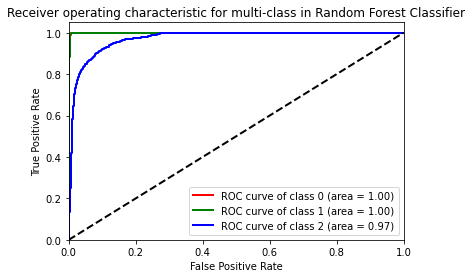

In [204]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load iris dataset as an example

X =df_final
y =df[['Delivery Status']]

# Binarize the labels
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a logistic regression classifier using the OvA strategy
clf = OneVsRestClassifier(rf_model)
clf.fit(X_train, Y_train)

# Compute the ROC curve and ROC-AUC score for each class
y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw =2
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class in Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [205]:
score = cross_val_score(rf_model,xtrain_resample,ytrain_resample,scoring="accuracy")
print(score)
np.mean(score)

[0.96309091 0.96127273 0.96545455 0.96145455 0.96090909]


0.9624363636363636

## KNN Classifier

In [206]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
k=knn.fit(xtrain_resample,ytrain_resample)

In [207]:
ypred_knn=k.predict(xtest)

print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.85      1.00      0.92      1430
           2       1.00      0.78      0.88      1095
           3       1.00      1.00      1.00       252

    accuracy                           0.96      6223
   macro avg       0.96      0.94      0.95      6223
weighted avg       0.97      0.96      0.96      6223



In [208]:
ypred_knn_trn=k.predict(xtrain_resample)
print(classification_report(ytrain_resample,ypred_knn_trn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       0.85      1.00      0.92      6000
           2       1.00      0.79      0.88      5000
           3       1.00      1.00      1.00      1500

    accuracy                           0.96     27500
   macro avg       0.96      0.95      0.95     27500
weighted avg       0.97      0.96      0.96     27500



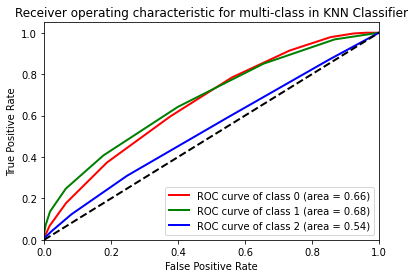

In [209]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load iris dataset as an example

X =df_final
y =df[['Delivery Status']]

# Binarize the labels
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a logistic regression classifier using the OvA strategy
clf = OneVsRestClassifier(knn)
clf.fit(X_train, Y_train)

# Compute the ROC curve and ROC-AUC score for each class
y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw =2
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class in KNN Classifier')
plt.legend(loc="lower right")
plt.show()

In [210]:
score = cross_val_score(k,xtrain_resample,ytrain_resample,scoring="accuracy")
print(score)
np.mean(score)

[0.96290909 0.96127273 0.96545455 0.96145455 0.96090909]


0.9623999999999999

## Naive bayes GaussianNB,BernoulliNB,MultinomialNB

In [211]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [212]:
gnb=GaussianNB()
gnb=gnb.fit(xtrain,ytrain)
gnb_pred=gnb.predict(xtest)

In [213]:
from sklearn.metrics import classification_report
print(classification_report(ytest,gnb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.86      0.99      0.92      1430
           2       0.98      0.78      0.87      1095
           3       1.00      1.00      1.00       252

    accuracy                           0.96      6223
   macro avg       0.96      0.94      0.95      6223
weighted avg       0.96      0.96      0.96      6223



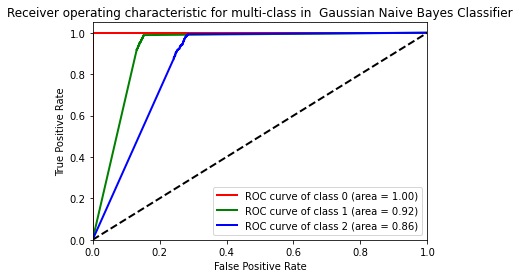

In [215]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load iris dataset as an example

X =df_final
y =df[['Delivery Status']]

# Binarize the labels
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a logistic regression classifier using the OvA strategy
clf = OneVsRestClassifier(gnb)
clf.fit(X_train, Y_train)

# Compute the ROC curve and ROC-AUC score for each class
y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw =2
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class in  Gaussian Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

In [216]:
score = cross_val_score(gnb,xtrain_resample,ytrain_resample,scoring="accuracy")
print(score)
np.mean(score)

[0.96018182 0.95872727 0.962      0.95836364 0.95945455]


0.9597454545454545

In [217]:
bnb=BernoulliNB()
bnb=bnb.fit(xtrain,ytrain)
bnb_pred=bnb.predict(xtest)

In [218]:
print(classification_report(ytest,bnb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.61      1.00      0.75      1430
           2       0.95      0.15      0.27      1095
           3       1.00      0.98      0.99       252

    accuracy                           0.85      6223
   macro avg       0.89      0.78      0.75      6223
weighted avg       0.90      0.85      0.81      6223



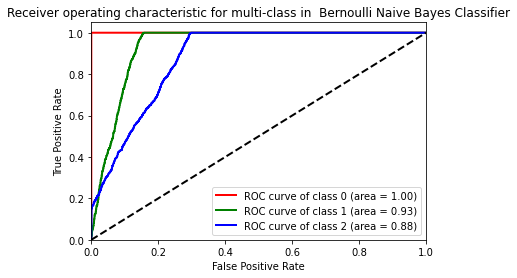

In [219]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load iris dataset as an example

X =df_final
y =df[['Delivery Status']]

# Binarize the labels
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a logistic regression classifier using the OvA strategy
clf = OneVsRestClassifier(bnb)
clf.fit(X_train, Y_train)

# Compute the ROC curve and ROC-AUC score for each class
y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw =2
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class in  Bernoulli Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

In [220]:
score = cross_val_score(bnb,xtrain_resample,ytrain_resample,scoring="accuracy")
print(score)
np.mean(score)

[0.84072727 0.842      0.84327273 0.84454545 0.844     ]


0.8429090909090909

In [221]:
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)
ypred_mnb_test=mnb.predict(xtest)

In [222]:
print(classification_report(ytest,ypred_mnb_test))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      3446
           1       0.48      0.32      0.38      1430
           2       0.47      0.01      0.01      1095
           3       0.00      0.00      0.00       252

    accuracy                           0.63      6223
   macro avg       0.40      0.33      0.30      6223
weighted avg       0.56      0.63      0.53      6223



We are having negative  values. So,Multinomial  wont be work good in these data.

# Ada boost

In [223]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(learning_rate=0.05)
adb=adb.fit(xtrain,ytrain)
adb_pred=adb.predict(xtest) 

In [224]:
print(classification_report(ytest,adb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.85      1.00      0.92      1430
           2       1.00      0.78      0.88      1095
           3       1.00      1.00      1.00       252

    accuracy                           0.96      6223
   macro avg       0.96      0.94      0.95      6223
weighted avg       0.97      0.96      0.96      6223



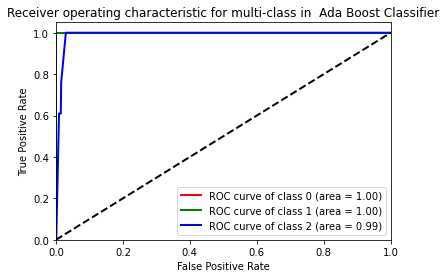

In [225]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load iris dataset as an example

X =df_final
y =df[['Delivery Status']]

# Binarize the labels
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a logistic regression classifier using the OvA strategy
clf = OneVsRestClassifier(adb)
clf.fit(X_train, Y_train)

# Compute the ROC curve and ROC-AUC score for each class
y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw =2
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class in  Ada Boost Classifier')
plt.legend(loc="lower right")
plt.show()

In [226]:
score = cross_val_score(adb,xtrain_resample,ytrain_resample,scoring="accuracy")
print(score)
np.mean(score)

[0.96309091 0.96127273 0.96545455 0.96145455 0.96090909]


0.9624363636363636

## Gradient  boost 

In [227]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc=gbc.fit(xtrain,ytrain)
gbc_pred=gbc.predict(xtest)
print(classification_report(ytest,gbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.86      1.00      0.92      1430
           2       1.00      0.78      0.88      1095
           3       1.00      1.00      1.00       252

    accuracy                           0.96      6223
   macro avg       0.96      0.94      0.95      6223
weighted avg       0.97      0.96      0.96      6223



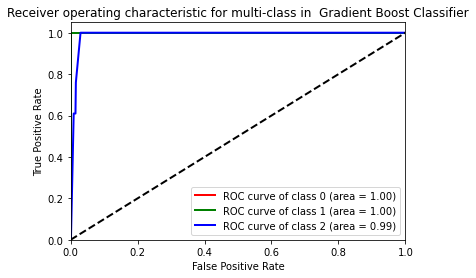

In [228]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load iris dataset as an example

X =df_final
y =df[['Delivery Status']]

# Binarize the labels
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a logistic regression classifier using the OvA strategy
clf = OneVsRestClassifier(adb)
clf.fit(X_train, Y_train)

# Compute the ROC curve and ROC-AUC score for each class
y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw =2
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class in  Gradient Boost Classifier')
plt.legend(loc="lower right")
plt.show()

In [229]:
score = cross_val_score(gbc,xtrain_resample,ytrain_resample,scoring="accuracy")
print(score)
np.mean(score)

[0.96309091 0.96127273 0.96545455 0.96145455 0.96090909]


0.9624363636363636

## XGBOOST


In [230]:
import xgboost as xgb
xgb_stratify =xgb.XGBClassifier()
xgb_stratify=xgb_stratify.fit(xtrain,ytrain)
xgb_stratify_pred = xgb_stratify.predict(xtest)
print(classification_report(ytest,xgb_stratify_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.86      1.00      0.92      1430
           2       1.00      0.78      0.88      1095
           3       1.00      1.00      1.00       252

    accuracy                           0.96      6223
   macro avg       0.96      0.94      0.95      6223
weighted avg       0.97      0.96      0.96      6223



In [231]:
score = cross_val_score(xgb_stratify,xtrain_resample,ytrain_resample,scoring="accuracy")
print(score)
np.mean(score)

[0.96309091 0.96127273 0.96545455 0.96145455 0.96090909]


0.9624363636363636

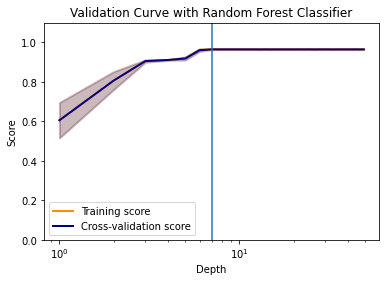

In [232]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), xtrain, ytrain, param_name="max_depth", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest Classifier")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.axvline(7)
plt.show()

In [233]:
rf_model = RandomForestClassifier(criterion ='entropy' , 
                                  n_estimators =100 ,
                                  max_depth = 7,
                                  max_features = 'log2',
                                  max_leaf_nodes =9,
                                  min_samples_leaf =2 ,
                                  min_samples_split = 2,
                                  random_state = 10)


rf_model.fit(xtrain_resample,ytrain_resample)

ypred_rf_tp = rf_model.predict(xtest)
ypred_rf_tp_train = rf_model.predict(xtrain_resample)
print(accuracy_score(ytest,ypred_rf_tp))
print(confusion_matrix(ytest,ypred_rf_tp))
print(classification_report(ytest,ypred_rf_tp))
print(classification_report(ytrain_resample,ypred_rf_tp_train))

0.9609513096577214
[[3446    0    0    0]
 [   0 1430    0    0]
 [   0  243  852    0]
 [   0    0    0  252]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.85      1.00      0.92      1430
           2       1.00      0.78      0.88      1095
           3       1.00      1.00      1.00       252

    accuracy                           0.96      6223
   macro avg       0.96      0.94      0.95      6223
weighted avg       0.97      0.96      0.96      6223

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       0.85      1.00      0.92      6000
           2       1.00      0.79      0.88      5000
           3       1.00      1.00      1.00      1500

    accuracy                           0.96     27500
   macro avg       0.96      0.95      0.95     27500
weighted avg       0.97      0.96      0.96     27500



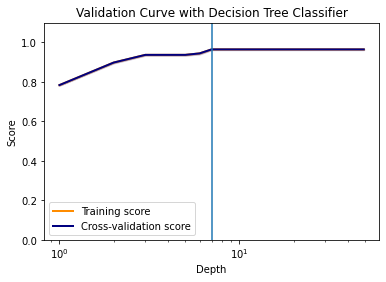

In [234]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), xtrain, ytrain, param_name="max_depth", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.axvline(7)
plt.show()

In [235]:
dt_grid_model = DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth =7,
                                  max_features = 'sqrt',
                                  max_leaf_nodes =18,
                                  min_samples_leaf = 4,
                                  min_samples_split = 2,
                                  random_state =10)
dt_grid_model=dt_grid_model.fit(xtrain,ytrain)
y_pred_dt_grid=dt_grid_model.predict(xtest)
y_train_pred_dt_grid=dt_grid_model.predict(xtrain)


In [236]:
print(classification_report(ytrain,y_train_pred_dt_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13784
           1       0.81      1.00      0.89      5719
           2       1.00      0.69      0.82      4378
           3       1.00      1.00      1.00      1008

    accuracy                           0.95     24889
   macro avg       0.95      0.92      0.93     24889
weighted avg       0.96      0.95      0.94     24889



In [237]:
print(classification_report(ytest,y_pred_dt_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3446
           1       0.79      1.00      0.89      1430
           2       1.00      0.66      0.80      1095
           3       1.00      1.00      1.00       252

    accuracy                           0.94      6223
   macro avg       0.95      0.92      0.92      6223
weighted avg       0.95      0.94      0.94      6223

